# 1. Pandas

## xlsx 파일을 DataFrame로 변환

* ***pd.read_excel('경로')***
* ***df.set_index('col_name')***

In [1]:
import pandas as pd
df = pd.read_excel('c:\\ohlc.xlsx')
df

C:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,date,open,high,low,close
0,2018-01-01,100,110,70,100
1,2018-01-02,200,210,180,190
2,2018-01-02,300,310,300,310


In [2]:
df = df.set_index('date')
df

,open,high,low,close
date,,,,
2018-01-01,100,110,70,100
2018-01-02,200,210,180,190
2018-01-02,300,310,300,310


## DataFrame을 xlsx파일로 변환

* ***df.to_excel('경로')***

In [5]:
df.to_excel('c:\\model\\ohlc-2.xlsx')

## 웹페이지 데이터를 DataFrame으로 가져오기

* ***pd.read_html(url)***
    + 웹페이지의 `<table>` 태그를 파싱해서 DataFrame으로 반환한다.
    + `<table>`이 여러개라면 DataFrame 리스트로 반환한다.
* (링크 : https://finance.yahoo.com/quote/AAPL/history?p=AAPL)

* NAN 발생했다면, 그 부분 제거 -> `df.dropna(axis=0)` : 0 :행제거, 1 : 열제거

In [15]:
import pandas as pd
url = 'https://finance.yahoo.com/quote/AAPL/history?p=AAPL'
df = pd.read_html(url)
df = df[0].set_index('Date')
df

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
"Apr 29, 2021",136.47,137.07,133.60,134.44,134.44,67829435
"Apr 28, 2021",134.31,135.02,133.08,133.58,133.58,106589600
"Apr 27, 2021",135.01,135.41,134.11,134.39,134.39,66015800
"Apr 26, 2021",134.83,135.06,133.56,134.72,134.72,66905100
"Apr 23, 2021",132.16,135.12,132.16,134.32,134.32,78657500
...,...,...,...,...,...,...
"Dec 10, 2020",120.50,123.87,120.15,123.24,123.06,81312200
"Dec 09, 2020",124.53,125.95,121.00,121.78,121.60,115089200
"Dec 08, 2020",124.37,124.98,123.09,124.38,124.19,82225500


# 5. 상승장 알리미(1)

## 5.1 pybithumb

### 5.1.1 가상화폐 티커 목록 얻기

* BTC, ENJ 이런게 ***Ticker***다
* ***`pybithumb.get_tickers()`***

In [1]:
import pybithumb

tickers = pybithumb.get_tickers()
print(tickers)
print(len(tickers))   ## 157개가 거래중이다.

C:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


['BTC', 'ETH', 'LTC', 'ETC', 'XRP', 'BCH', 'QTUM', 'BTG', 'EOS', 'ICX', 'TRX', 'ELF', 'OMG', 'KNC', 'GLM', 'ZIL', 'WAXP', 'POWR', 'LRC', 'STEEM', 'STRAX', 'ZRX', 'REP', 'XEM', 'SNT', 'ADA', 'CTXC', 'BAT', 'WTC', 'THETA', 'LOOM', 'WAVES', 'TRUE', 'LINK', 'ENJ', 'VET', 'MTL', 'IOST', 'TMTG', 'QKC', 'HDAC', 'AMO', 'BSV', 'ORBS', 'TFUEL', 'VALOR', 'CON', 'ANKR', 'MIX', 'CRO', 'FX', 'CHR', 'MBL', 'MXC', 'FCT', 'TRV', 'DAD', 'WOM', 'SOC', 'EM', 'BOA', 'FLETA', 'SXP', 'COS', 'APIX', 'EL', 'BASIC', 'HIVE', 'XPR', 'VRA', 'FIT', 'EGG', 'BORA', 'ARPA', 'APM', 'CKB', 'AERGO', 'ANW', 'CENNZ', 'EVZ', 'CYCLUB', 'SRM', 'QTCON', 'UNI', 'YFI', 'UMA', 'AAVE', 'COMP', 'REN', 'BAL', 'RSR', 'NMR', 'RLC', 'UOS', 'SAND', 'GOM2', 'RINGX', 'BEL', 'OBSR', 'ORC', 'POLA', 'AWO', 'ADP', 'DVI', 'GHX', 'MIR', 'MVC', 'BLY', 'WOZX', 'ANV', 'GRT', 'MM', 'BIOT', 'XNO', 'SNX', 'RAI', 'COLA', 'NU', 'OXT', 'LINA', 'MAP', 'AQT', 'WIKEN', 'CTSI', 'MANA', 'LPT', 'MKR', 'SUSHI', 'ASM', 'PUNDIX', 'CELR', 'LF', 'ARW', 'MSB', 'RLY

### 5.1.2 현재가 얻기

* ***`get_current_price('Ticker')`***

* 정해진 시간마다 정보 업데이트
    - `import time`
    - `time.sleep(1)`

In [4]:
import pybithumb

price = pybithumb.get_current_price('BTC')
print(price)

75050000.0


In [5]:
## 1초마다 정보 얻어오기
import time

while True:
    price = pybithumb.get_current_price('BTC')
    print(price)
    time.sleep(1)

75059000.0
75059000.0
75059000.0
75059000.0
75059000.0
75040000.0
75040000.0
75040000.0
75059000.0
75059000.0
75040000.0
75040000.0
75059000.0
75059000.0


KeyboardInterrupt: 

In [23]:
# 모든 Ticker의 현재가를 출력해보자

import pybithumb
import time

tickers = pybithumb.get_tickers()
for ticker in tickers:
    price =pybithumb.get_current_price(ticker)
    print(ticker, price)
    time.sleep(0.001)

BTC 63319000.0
ETH 3279000.0
LTC 302100.0
ETC 40910.0
XRP 1631.0
BCH 1044000.0
QTUM 16880.0
BTG 104300.0
EOS 6965.0
ICX 2736.0
TRX 143.3
ELF 521.1
OMG 8510.0
KNC 3821.0
GLM 517.1
ZIL 229.0
WAXP 265.0
POWR 467.6
LRC 621.7
STEEM 995.7
STRAX 2423.0
AE 453.3
ZRX 2001.0
REP 43330.0
XEM 399.9
SNT 191.2
ADA 1606.0
CTXC 310.0
BAT 1406.0
WTC 1883.0
THETA 13810.0
LOOM 176.8
WAVES 22500.0
TRUE 284.1
LINK 42930.0
RNT 36.3
ENJ 3169.0
VET 223.4
MTL 4580.0
IOST 72.1
TMTG 7.319
QKC 33.91
HDAC 99.49
WET 4.813
AMO 5.575
BSV 338800.0
DAC 6.494
ORBS 149.2
TFUEL 385.9
VALOR 767.5
CON 7.18
ANKR 193.5
MIX 8.43
LAMB 95.76
CRO 220.3
FX 742.9
CHR 416.7
MBL 19.5
MXC 53.21
DVP 52.3
FCT 203.8
FNB 7.687
TRV 28.79
PCM 20.81
DAD 409.9
AOA 5.37
XSR 4.724
WOM 283.7
SOC 12.31
EM 10.4
QBZ 7.935
BOA 460.3
FLETA 25.3
SXP 5325.0
COS 39.11
APIX 98.31
EL 21.43
BASIC 9.317
HIVE 740.0
XPR 15.39
FIT 4.975
EGG 8.711
BORA 300.1
ARPA 112.6
APM 41.57
AERGO 401.1
ANW 125.8
CENNZ 99.8
EVZ 89.51
MCI 56.06
SRM 10800.0
QTCON 92.77
UNI 48

### 5.1.3 거래소 거래 정보

* ***`get_market_detail('Ticker')`***
    + 24시간 동안의 시가/고가/저가/종가(현재가)/거래량 정보
    + 튜플 타입, 인덱싱으로 정보를 가져온다. ***[시가, 고가, 저가, 종가, 거래량]***
    

In [4]:
import pybithumb

detail = pybithumb.get_market_detail('BTC')
print(detail)

(66411000.0, 69300000.0, 66406000.0, 69082000.0, 2272.53723353)


### 5.1.4 호가

+ ***`get_orderbook()`***
    + pybitumb은 호가 정보를 제공한다.
    <br><br>
    + 호가 정보를 ***dict***로 받아온다.
    
    + key 값들 : ***[timestamp, payment_currency, order_currency, bids, asks]***
        - bid, ask는 5개씩 출력한다. 더 출력할 수 있는지 확인 해보자
    <br><br>
    + 매도 호가(ask) : 가상화폐를 팔고자 하는 사람이 제시한 가격과 수량
    + 매수 호가(bid) : 가상화폐를 사고자 하는 사람이 제시한 가격과 수량
    

In [5]:
import pybithumb

orderbook = pybithumb.get_orderbook('BTC')
print(orderbook)
print("-"*100)

for k in orderbook:
    print(k)

{'timestamp': '1619850469822', 'payment_currency': 'KRW', 'order_currency': 'BTC', 'bids': [{'price': 69101000.0, 'quantity': 0.0184}, {'price': 69099000.0, 'quantity': 0.012}, {'price': 69084000.0, 'quantity': 0.0061}, {'price': 69083000.0, 'quantity': 0.015}, {'price': 69081000.0, 'quantity': 0.0036}], 'asks': [{'price': 69129000.0, 'quantity': 0.0343}, {'price': 69130000.0, 'quantity': 0.0303}, {'price': 69140000.0, 'quantity': 0.0023}, {'price': 69141000.0, 'quantity': 0.1136}, {'price': 69143000.0, 'quantity': 0.002}]}
----------------------------------------------------------------------------------------------------
timestamp
payment_currency
order_currency
bids
asks


In [6]:
print(orderbook['payment_currency'])  # 원화로 고정
print(orderbook['order_currency'])
print(orderbook['timestamp'])

KRW
BTC
1619850469822


* timestamp : 조회한 시간(ms 단위 1/1000 초)
* str형식으로 출력된다.
* `datetime.datetime.fromtimestamp(ms/1000)` 모듈을 통해 시간으로 변경할 수 있다.

In [7]:
import pybithumb
import datetime

orderbook = pybithumb.get_orderbook('BTC')
ms = int(orderbook['timestamp'])

dt = datetime.datetime.fromtimestamp(ms/1000)
print(dt)

2021-05-01 15:28:07.921000


* orderbook의 ask(매도), bid(매수) 호가에 접근
* key값으로 인덱싱해서 접근한다.

In [8]:
bids = orderbook['bids']
asks = orderbook['asks']
print(bids)
print(asks)

[{'price': 69101000.0, 'quantity': 0.7988}, {'price': 69100000.0, 'quantity': 0.0076}, {'price': 69095000.0, 'quantity': 0.0491}, {'price': 69089000.0, 'quantity': 0.0097}, {'price': 69088000.0, 'quantity': 0.009}]
[{'price': 69130000.0, 'quantity': 0.0304}, {'price': 69138000.0, 'quantity': 0.1514}, {'price': 69140000.0, 'quantity': 0.0023}, {'price': 69141000.0, 'quantity': 0.1136}, {'price': 69143000.0, 'quantity': 0.002}]


In [9]:
for bid in bids:
    price, quantity = bid['price'], bid['quantity'] 
    print(f'bid_price : {price}, Volume : {quantity}')
for ask in asks:
    price, quantity = ask['price'], ask['quantity'] 
    print(f'ask_price : {price}, Volume : {quantity}')

bid_price : 69101000.0, Volume : 0.7988
bid_price : 69100000.0, Volume : 0.0076
bid_price : 69095000.0, Volume : 0.0491
bid_price : 69089000.0, Volume : 0.0097
bid_price : 69088000.0, Volume : 0.009
ask_price : 69130000.0, Volume : 0.0304
ask_price : 69138000.0, Volume : 0.1514
ask_price : 69140000.0, Volume : 0.0023
ask_price : 69141000.0, Volume : 0.1136
ask_price : 69143000.0, Volume : 0.002


### 5.1.5 여러 가상화폐에 대한 정보 한번에 얻기

* 빗썸 API는 1초에 95회까지 요청 가능하다. 더 넘어가면 사용에 제한이 있으므로 API 사용 횟수를 고려해서 프로그래밍 해야 한다.
* get_current_price() 함수를 빠르게 반복하면 호출에 제한이 발생할 수 있다,
* 따라서 모든 가상화폐를 한번에 조회할 때는 ***`get_currnet_price('ALL')`*** 을 사용한다.
<br><br>
|key : Ticker| value : {정보}|
|------------|---------------|
|opening_price|시가 00시 기준|
|closing_price|종가 00시 기준, 현재가|
|min_price|저가 00시 기준|
|max_price|고가 00시 기준|
|acc_trad_value|거래금액 00시 기준|
|units_traded|거래량(Ticker 개수) 00시 기준|
|prev_closing_price|전일종가|
|units_traded_24H|최근 24시간 거래량|
|acc_trade_value_24H|최근 24시간 거래금액|
|fluctate_24H|최근 24시간 변동가|
|flucte_rate_24H|최근 24시간 변동률|

In [10]:
import pybithumb

all = pybithumb.get_current_price('ALL')
for k, v in all.items():
    print(k,v)

BTC {'opening_price': '66411000', 'closing_price': '69138000', 'min_price': '66406000', 'max_price': '69300000', 'units_traded': '2273.2683594', 'acc_trade_value': '154641048837.9058', 'prev_closing_price': '66423000', 'units_traded_24H': '3841.71960053', 'acc_trade_value_24H': '256429784347.872', 'fluctate_24H': '5265000', 'fluctate_rate_24H': '8.24'}
ETH {'opening_price': '3248000', 'closing_price': '3392000', 'min_price': '3238000', 'max_price': '3406000', 'units_traded': '29033.65355306', 'acc_trade_value': '95879650443.2339', 'prev_closing_price': '3248000', 'units_traded_24H': '45682.00041088', 'acc_trade_value_24H': '149925801177.9383', 'fluctate_24H': '122000', 'fluctate_rate_24H': '3.73'}
LTC {'opening_price': '317200', 'closing_price': '322800', 'min_price': '313700', 'max_price': '325700', 'units_traded': '41052.66568297', 'acc_trade_value': '13157000689.5303', 'prev_closing_price': '317000', 'units_traded_24H': '57979.10192164', 'acc_trade_value_24H': '18454246650.1748', 'f

* pybithumb.get_current_price('ALL') 을 활용해서 가상화폐의 현재(closing_price)가 출력해보기

In [11]:
import pybithumb

all = pybithumb.get_current_price('ALL')
for ticker, data in all.items():
    print(ticker, data['closing_price'])

BTC 69101000
ETH 3394000
LTC 323200
ETC 46450
XRP 1892
BCH 1203000
QTUM 17760
BTG 112900
EOS 7775
ICX 3093
TRX 156.9
ELF 530.2
OMG 9270
KNC 3836
GLM 547.4
ZIL 248.6
WAXP 275.1
POWR 501
LRC 672.6
STEEM 1059
STRAX 2765
AE 500.7
ZRX 2180
REP 49390
XEM 415
SNT 207.2
ADA 1606
CTXC 319.3
BAT 1483
WTC 2014
THETA 14500
LOOM 183.9
WAVES 26770
TRUE 312
LINK 45680
RNT 47.51
ENJ 3294
VET 238
MTL 4663
IOST 78.46
TMTG 7.569
QKC 36.87
HDAC 112.9
WET 3.354
AMO 5.619
BSV 382000
DAC 6.391
ORBS 157.4
TFUEL 433.9
VALOR 775.7
CON 7.32
ANKR 215.7
MIX 8.705
LAMB 98.24
CRO 232.2
FX 823.1
CHR 423.6
MBL 20.01
MXC 56.77
DVP 52.9
FCT 216.4
FNB 7.78
TRV 29.57
PCM 21.1
DAD 427
AOA 5.632
XSR 3.699
WOM 287.2
SOC 12.66
EM 10.76
QBZ 7.917
BOA 492.1
FLETA 24.63
SXP 6325
COS 39.6
APIX 103.2
EL 20.74
BASIC 10.64
HIVE 748.3
XPR 15.54
FIT 5.088
EGG 9.1
BORA 306.2
ARPA 132.6
APM 45.82
AERGO 411.4
ANW 132.3
CENNZ 103.4
EVZ 94.94
MCI 60.01
SRM 11180
QTCON 92.93
UNI 48460
YFI 58004000
UMA 31220
AAVE 539000
COMP 881000
SAND 736.

###  5.1.6 예외처리
* pybithumb 모듈의 함수는 인터넷을 사용해 빗썸 서버에 특정 작업을 요청한다.
* 만약 서버가 불안정하면 오류가 발생할 수 있으므로, 항상 예외 처리를 해줘야 한다.

-------------------------------
## 5.2. 상승장 알리미(1)

### 5.2.1 이동평균을 사용한 상승장/하락장 구분

+ 종가의 ***이동평균(Moving Average)***을 사용해서 상승장과 하락장을 구분하는 방법을 소개.

### 5.2.2 거래소 과거 시세 얻어오기

+ `get_ohlcv()`  : 웹스크래핑을 통해 일봉 데이터를 가져온다.

In [2]:
import pybithumb
import numpy as np 
import pandas as pd


btc = pybithumb.get_ohlcv('BTC')
btc_df = pd.DataFrame(btc)
btc_df

,open,high,low,close,volume
time,,,,,
2013-12-27 00:00:00,737000.0,755000.0,737000.0,755000.0,3.780000
2013-12-28 00:00:00,750000.0,750000.0,750000.0,750000.0,12.000000
2013-12-29 00:00:00,750000.0,750000.0,728000.0,739000.0,19.058000
2013-12-30 00:00:00,740000.0,772000.0,740000.0,768000.0,9.488973
2013-12-31 00:00:00,768000.0,800000.0,763000.0,768000.0,18.650350
...,...,...,...,...,...
2021-10-29 00:00:00,74098000.0,74740000.0,70580000.0,73710000.0,5107.468169
2021-10-30 00:00:00,73745000.0,75452000.0,72923000.0,73456000.0,4183.696215
2021-10-31 00:00:00,73444000.0,74500000.0,71910000.0,72129000.0,3791.898177


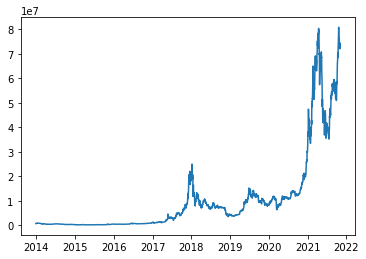

In [3]:
import matplotlib.pyplot as plt
plt.plot(btc_df['close'])

### 5.2.3 이동평균 계산하기

+ DataFrame에서 종가 Series를 얻어오고, Series에 정수 인덱싱을 사용해서 다섯 개의 값을 가져온다.

In [4]:
import pybithumb

btc = pybithumb.get_ohlcv('BTC')
close = btc['close']
print((close[0]+close[1]+close[2]+close[3]+close[4]+close[5])/5)
print((close[1]+close[2]+close[3]+close[4]+close[5]+close[6])/5)
print((close[2]+close[3]+close[4]+close[5]+close[6]+close[7])/5)
print((close[3]+close[4]+close[5]+close[6]+close[7]+close[8])/5)

911400.0
916000.0
932800.0
954200.0


+ Series는 rolling(), mean() 메서드를 제공한다.
    - `rolling(n)` : n일 윈도우를 설정, n일씩 모든 데이터를 그룹화한다.
    - `mean()` : 그룹화된 값의 평균을 구한다. 계산된 결과는 Series로 ma5 변수에 저장한다.

In [5]:
import pybithumb

btc = pybithumb.get_ohlcv('BTC')
close = btc['close']

window = close.rolling(5)
ma5 = window.mean()
# ma5 =close.rolling(5).mean()
print(ma5)

time
2013-12-27 00:00:00           NaN
2013-12-28 00:00:00           NaN
2013-12-29 00:00:00           NaN
2013-12-30 00:00:00           NaN
2013-12-31 00:00:00      756000.0
                          ...    
2021-10-29 00:00:00    74313600.0
2021-10-30 00:00:00    73668200.0
2021-10-31 00:00:00    73136400.0
2021-11-01 00:00:00    73290200.0
2021-11-02 21:00:00    73362800.0
Name: close, Length: 2778, dtype: float64


### 5.2.4 상승장/하락장 구분하는 함수 구현하기

+ 현재가 > 5일 이평선 : 상승장
+ 현재가 =< 5일 이평성 : 하락장

In [6]:
import pybithumb

df = pybithumb.get_ohlcv('BTC')
ma5 = df['close'].rolling(window = 5).mean()
last_ma5 = ma5[-2]   # 비교할 때 전일 이평선을 사용한다, 오늘 이평선은 종가에 생성 되므로!

price = pybithumb.get_current_price('BTC')

if price > last_ma5:
    print('상승장')
else :
    print('하락장')

상승장


### 5.2.5 가상화폐별 상승장/하락장 판단하기

+ ***`bull_market()`***이라는 함수를 만들어 위 내용을 정의
    + 함수는 하나의 티커를 입력받고, 해당 티커의 이동평균과 현재가를 계산해서 비교한다.
    + return은 True or False

In [7]:
def bull_market(ticker = 'BTC', n = 5):
    df = pybithumb.get_ohlcv(ticker)
    ma_n = df['close'].rolling(n).mean()
    last_ma_n =ma_n[-2]
    
    price = pybithumb.get_current_price(ticker)
    
    if price > last_ma_n:
        return True
    else :
        return False

In [8]:
is_bull = bull_market('BTC', 5)
if is_bull :
    print('상승장')

상승장


In [9]:
tickers = pybithumb.get_tickers()
for ticker in tickers:
    is_bull = bull_market(ticker)
    if is_bull :
        print(ticker, '상승장')
    else :
        print(ticker, '하락장')

BTC 상승장
ETH 상승장
LTC 상승장
ETC 상승장
XRP 상승장
BCH 상승장
QTUM 상승장
BTG 상승장
EOS 상승장
ICX 상승장
TRX 상승장
ELF 상승장
OMG 상승장
KNC 상승장
GLM 상승장
ZIL 상승장
WAXP 상승장
POWR 상승장
LRC 상승장
STEEM 상승장
STRAX 상승장
ZRX 상승장
REP 상승장
XEM 상승장
SNT 상승장
ADA 하락장
CTXC 상승장
BAT 상승장
WTC 상승장
THETA 상승장
LOOM 상승장
WAVES 하락장
TRUE 하락장
LINK 상승장
ENJ 상승장
VET 상승장
MTL 상승장
IOST 상승장
TMTG 하락장
QKC 상승장
HDAC 하락장
AMO 하락장
BSV 상승장
ORBS 상승장
TFUEL 상승장
VALOR 하락장
CON 하락장
ANKR 상승장
MIX 상승장
CRO 상승장
FX 하락장
CHR 상승장
MBL 상승장
MXC 하락장
FCT 상승장
TRV 하락장
DAD 하락장
WOM 하락장
SOC 하락장
EM 상승장
BOA 상승장
FLETA 상승장
SXP 상승장
COS 하락장
APIX 하락장
EL 하락장
BASIC 하락장
HIVE 상승장
XPR 하락장
VRA 상승장
FIT 하락장
EGG 하락장
BORA 상승장
ARPA 상승장
APM 하락장
CKB 상승장
AERGO 상승장
ANW 하락장
CENNZ 상승장
EVZ 하락장
CYCLUB 상승장
SRM 상승장
QTCON 상승장
UNI 상승장
YFI 하락장
UMA 상승장
AAVE 하락장
COMP 상승장
REN 하락장
BAL 상승장
RSR 상승장
NMR 상승장
RLC 상승장
UOS 상승장
SAND 상승장
GOM2 하락장
RINGX 하락장
BEL 상승장
OBSR 하락장
ORC 상승장
POLA 상승장
AWO 하락장
ADP 하락장
DVI 하락장
GHX 상승장
MIR 상승장
MVC 하락장
BLY 하락장
WOZX 하락장
ANV 하락장
GRT 상승장
MM 하락장
BIOT 상승장
XNO 하락장
SNX 상승장
RAI 상승장
COLA 하락장
NU 하락장
OXT 상승장
L

* '하락장' 값만 뽑아오기  

In [10]:
tickers = pybithumb.get_tickers()
bear = []
for ticker in tickers:
    is_bull = bull_market(ticker)
    if is_bull == False:
        bear.append(ticker)

In [11]:
print(bear)

['ADA', 'WAVES', 'TRUE', 'TMTG', 'HDAC', 'AMO', 'VALOR', 'CON', 'FX', 'MXC', 'TRV', 'DAD', 'WOM', 'SOC', 'COS', 'APIX', 'EL', 'BASIC', 'XPR', 'FIT', 'EGG', 'APM', 'ANW', 'EVZ', 'YFI', 'AAVE', 'REN', 'GOM2', 'RINGX', 'OBSR', 'AWO', 'ADP', 'DVI', 'MVC', 'BLY', 'WOZX', 'ANV', 'MM', 'XNO', 'COLA', 'NU', 'CELR', 'LF', 'ARW', 'MSB', 'BFC', 'XVS', 'AXS', 'DAI', 'MATIC', 'VELO', 'GXC', 'VSYS', 'IPX', 'WICC', 'LUNA', 'XTZ', 'WEMIX', 'ATOM', 'TEMCO', 'DOGE', 'XEC']


## 5.3 상승장 알리미(2)

### 5.3.1 QT Desinger를 이용한 UI 만들기

+ C:\Anaconda3\Library\bin\desinger.exe  : 여기서 QT Desinger를 실행한다.
+ bull.ui로 저장하고 불러오기 위해서는 같은 경로에 저장해야 한다.

### 5.3.2 UI 불러오기

+ `uic.loadUiType()` : QT Desinger로 생성한 파일을 로드한다.
+ MyWindow 클래스는 QMainWindow와 ui파일을 로드한 form_class 클래스를 다중 상속 받는다.
+ `인스턴스.show()`를 통해 윈도우를 화면에 그린다.
+ `app.exec_()` 을 통해 이벤트 루프를 진행한다.

In [1]:
import sys
from PyQt5.QtWidgets import *
from PyQt5 import uic

form_class = uic.loadUiType('bull.ui')[0]

class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)

app = QApplication(sys.argv)
win = MyWindow()
win.show()
app.exec_()

0

### 5.3.3 타이머 만들기
+ GUI 프로그램에서 타이머를 사용하면 주기적으로 가상화폐의 가격을 쉽게 얻어올 수 있다.
+ QTimer 객체를 생성한 후 5초마다 timeout() 메서드가 호출되도록 코드를 추가한다.
+ QTimer 객체를 생성하기 위해 `PyQt5.QtCore`를 import 한다

In [1]:
import sys
from PyQt5.QtWidgets import *
from PyQt5 import uic
from PyQt5.QtCore import *

form_class = uic.loadUiType('bull.ui')[0]

class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)
        
        timer = QTimer(self)  # Qtimer 클래스에서 인스턴스 생성
        timer.start(5000)     # 5초 마다 한번씩 timeout 이벤트 발생하기
        timer.timeout.connect(self.timeoutprint)
        # timeout이벤트           # timeoutprint 함수

        
    def timeoutprint(self) :
        print('5초에요!!')
        
        
app = QApplication(sys.argv)
win = MyWindow()
win.show()
app.exec_()

5초에요!!


0

### 5.3.4 가상화폐 이름 출력하기

![이미지](./picture/bullui.PNG)

+ QTableWidget 클래스로, tableWidget 객체(인스턴스)를 만들었다.
+ QTableWidgetItem() 메서드로, table에 넣을 것을 넣어준다.
+ self.tableWidget(인스턴스).setItem(i, 0, item) 의 setItem(i(index), 0(넣을 열), item)으로 값을 넣어준다.

In [1]:
import sys
import pybithumb
from PyQt5.QtWidgets import *
from PyQt5 import uic
from PyQt5.QtCore import *

tickers = ['BTC', 'ETH', 'BCH', 'ETC']
form_class = uic.loadUiType('bull.ui')[0]

class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)
        
        timer = QTimer(self)  
        timer.start(5000)     
        timer.timeout.connect(self.timeoutcoin)

        
    def timeoutcoin(self) :
        for i, ticker in enumerate(tickers):
            item = QTableWidgetItem(ticker)
            self.tableWidget.setItem(i, 0, item)
        
        
app = QApplication(sys.argv)
win = MyWindow()
win.show()
app.exec_()

0

In [12]:
import os
os.getcwd()

'C:\\netsong7\\pythonwork\\pycharmwork\\BitcoinProject'

![이미지](./picture/bull520.PNG)

In [1]:
import sys
import pybithumb
from PyQt5.QtWidgets import *
from PyQt5 import uic
from PyQt5.QtCore import *


tickers = ['BTC', 'ETH', 'BCH', 'ETC', 'ENJ']
form_class = uic.loadUiType('bull.ui')[0]

class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)
        
        timer = QTimer(self)  
        timer.start(5000)     
        timer.timeout.connect(self.timeoutcoin)


    def get_market_infos(self, ticker):
        df = pybithumb.get_ohlcv(ticker)
        ma5 = df['close'].rolling(window=5).mean()
        ma20 = df['close'].rolling(window=20).mean()
        last_ma5 = ma5[-2]
        last_ma20 = ma20[-2]

        price = pybithumb.get_current_price(ticker)

        state5, state20 = None, None
        if price > last_ma5:
            state5 = '상승장'
        else :
            state5 = '하락장'

        if price > last_ma20:
            state20 = '상승장'
        else :
            state20 = '상승장'
        
        return price, last_ma20, state20,last_ma5, state5
        
    def timeoutcoin(self) :
        for i, ticker in enumerate(tickers):
            item = QTableWidgetItem(ticker)
            self.tableWidget.setItem(i, 0, item)
            
            price, last_ma20, state20, last_ma5, state5 = self.get_market_infos(ticker)
            self.tableWidget.setItem(i, 1, QTableWidgetItem(str(price)))
            self.tableWidget.setItem(i, 2, QTableWidgetItem(str(last_ma20)))
            self.tableWidget.setItem(i, 3, QTableWidgetItem(state20))           # 항상 QTableWidgetitem은 문자열로 넣어줘야 한다.
            self.tableWidget.setItem(i, 4, QTableWidgetItem(str(last_ma5)))
            self.tableWidget.setItem(i, 5, QTableWidgetItem(state5))
            
        
        
app = QApplication(sys.argv)
win = MyWindow()
win.show()
app.exec_()

0

## 5.4 상승장 알리미(스레드 버전)

+ 파이썬 인터프리터에 두가지 일을 동시에 지정하면, 일을 순차적으로 처리하므로 버벅될 수 있다.
+ 이때 ***스레드(threa)***를 사용한다.
+ 메인 스레드는 GUI를 담당하고, 추가한 스레드는 가격 조회만을 담당한다.(버벅되는 문제 해결)
+ 파이썬에서 여러가지 스레드가 있지만 여기서는 `QThread` 클래스를 사용한다.
+ `QTread`를 상속 받으면 스레드가 지정된다.
+ `Thread`를 상속받은 클래스의 인스턴스는 `start()` 메서드를 통해 호출된다.

In [1]:
import sys
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *

class Worker(QThread):           # Thread를 상속시킨다.
    def run(self):
        while True:
            print('안녕하세요')
            self.sleep(1)

class MyWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.worker = Worker()
        self.worker.start()        # `Thread`를 상속받은 클래스의 인스턴스는 `start()` 메서드를 통해 호출된다.
                                    # start() 메서드를 Worker 인스턴스의 run 메서드를 호출한다.
app = QApplication(sys.argv)
mywindow = MyWindow()
mywindow.show()
app.exec_()

안녕하세요
안녕하세요
안녕하세요
안녕하세요
안녕하세요
안녕하세요
안녕하세요
안녕하세요
안녕하세요
안녕하세요
안녕하세요
안녕하세요


KeyboardInterrupt: 

+ Worker 클래스의 객체가 MyWindow 클래스의 객체에게 데이터 처리가 완료됐음을 알려주고
+ MyWindow 클래스의 객체는 데이터를 가져가는 형태로 프로그램을 구현해야 한다.

+ PyQt의 시그널/슬롯 메커니즘을 이용한다.

In [1]:
import sys
import pybithumb
from PyQt5.QtWidgets import *
from PyQt5 import uic
from PyQt5.QtCore import *
import pybithumb
import time


tickers = ['BTC', 'ETH', 'BCH', 'ETC', 'ENJ']
form_class = uic.loadUiType('bull.ui')[0]
        
class Worker(QThread):
    finished = pyqtSignal(dict)       # finished 라고 내가 signal을 정의한 것이다. 
    
    def run(self):
        while True:
            self.sleep(1)
            data = {}
            
            for ticker in tickers:
                data[ticker] = self.get_market_infos(ticker)
            
            self.finished.emit(data)                # 내가 만든 시그널을 발생(emit) 시키는 부분
                                                    # data 라는 dict 형태의 객체가 전송된다.

            time.sleep(2) 
  
    def get_market_infos(self, ticker):
        try :
            df = pybithumb.get_ohlcv(ticker)
            ma5 = df['close'].rolling(window=5).mean()
            ma20 = df['close'].rolling(window=20).mean()
            last_ma5 = ma5[-2]
            last_ma20 = ma20[-2]

            price = pybithumb.get_current_price(ticker)

            state5, state20 = None, None
            if price > last_ma5:
                state5 = '상승장'
            else :
                state5 = '하락장'

            if price > last_ma20:
                state20 = '상승장'
            else :
                state20 = '상승장'

            return price, last_ma20, state20,last_ma5, state5
        
        except Exception as e:
            print('get_market_infos error',e)
            
            return None, None, None, None, None
    
class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)
        
        self.worker = Worker()   # Worker 라는 스레드 전용 클래스의 worker인스턴스 생성
        self.worker.finished.connect(self.update_table_widget)  # 바인딩 역할 finished 시그널이 발생하면, 
                                                                # self.update 함수가 호출되도록 설정
        self.worker.start()       # worker.start() 메서드를 통해 Worker 클래스의 run 매서드를 호출한다.
    
    @pyqtSlot(dict)
    def update_table_widget(self, data) :
        try :
            for ticker, infos in data.items():
                index = tickers.index(ticker)
                
                self.tableWidget.setItem(index, 0, QTableWidgetItem(ticker))
                self.tableWidget.setItem(index, 1, QTableWidgetItem(str(infos[0])))
                self.tableWidget.setItem(index, 2, QTableWidgetItem(str(infos[1])))
                self.tableWidget.setItem(index, 3, QTableWidgetItem(str(infos[2])))           # 항상 QTableWidgetitem은 문자열로 넣어줘야 한다.
                self.tableWidget.setItem(index, 4, QTableWidgetItem(str(infos[3])))
                self.tableWidget.setItem(index, 5, QTableWidgetItem(str(infos[4])))

        except Exception as e:
            print('update_table_wiget error',e)
            pass
                                   
        
        
app = QApplication(sys.argv)
win = MyWindow()
win.show()
app.exec_()

0

# 6 변동성 돌파전략 구현

+ 매수/매도 잔고 조회 등을 할 수 있는 Private API를 사용한다. 

## 6.1 빗썸 Private API

### 6.1.2 Bithumb 클래스 생성

+ pybithumb 모듈은 Connect Key와 Secret key로 사용자를 인증한 이후에 private API를 제어할 수 있다.
+ pybithumb 모듈에는 Bithumb 이라는 클래스가 있다 -> 여기서 빗썸 거래소의 private API를 위한 메서드들이 있다.

In [1]:
import pybithumb

con_key = "con_key"
sec_key = "sec_key" 

bithumb = pybithumb.Bithumb(con_key, sec_key)
print(bithumb)

### 6.1.3 잔고조회

+ `Bithumb`클래스의 `get_balance(ticker)` : 보유 가상화폐의 잔고 조회
+ (BTC코인 개수, 거래중인 BTC 코인 개수, 보유중인 총원화(***주문에 사용된 원화 포함***), 주문에 사용된 원화)
    - 지정가 주문, 시장가 주문시 개수 구할 때, ***보유중인 총원화 - 주문에 사용된 원화*** 해야한다.
+ format(balance[0], 'f') 로 보기 좋게 표현한다.

In [12]:
balance_BTC, balance_ENJ, balance_XRP, balance_ETH = bithumb.get_balance('BTC'), bithumb.get_balance('ENJ'), bithumb.get_balance('XRP'), bithumb.get_balance('ETH')
print(balance_BTC, balance_ENJ, balance_XRP, balance_ETH)
print(format(balance[0], 'f'))

(6.41e-05, 0.0, 127029.583, 8021.0) (5.0, 0.0, 127029.583, 8021.0) (5.0, 0.0, 127029.583, 8021.0) (0.01, 0.0, 127029.583, 8021.0)
0.000064


* 모든 가상화폐의 잔고 조회

In [12]:
import pybithumb
import time

con_key = 'con_key'
sec_key = 'sec_key'

bithumb = pybithumb.Bithumb(con_key, sec_key)

for ticker in pybithumb.get_tickers() :
    balance = bithumb.get_balance(ticker)
    print(ticker, " 잔고 :", balance)
    time.sleep(0.1)

BTC  잔고 : (4.683e-05, 0.0, 1.756901, 0.0)
ETH  잔고 : (0.0, 0.0, 1.756901, 0.0)
LTC  잔고 : (0.0, 0.0, 1.756901, 0.0)
ETC  잔고 : (0.0, 0.0, 1.756901, 0.0)
XRP  잔고 : (0.0, 0.0, 1.756901, 0.0)
BCH  잔고 : (0.0, 0.0, 1.756901, 0.0)
QTUM  잔고 : (0.0, 0.0, 1.756901, 0.0)
BTG  잔고 : (0.0, 0.0, 1.756901, 0.0)
EOS  잔고 : (0.0, 0.0, 1.756901, 0.0)
ICX  잔고 : (0.0, 0.0, 1.756901, 0.0)
TRX  잔고 : (0.0, 0.0, 1.756901, 0.0)
ELF  잔고 : (0.0, 0.0, 1.756901, 0.0)
OMG  잔고 : (0.0, 0.0, 1.756901, 0.0)
KNC  잔고 : (0.0, 0.0, 1.756901, 0.0)
GLM  잔고 : (0.0, 0.0, 1.756901, 0.0)
ZIL  잔고 : (0.0, 0.0, 1.756901, 0.0)
WAXP  잔고 : (0.0, 0.0, 1.756901, 0.0)
POWR  잔고 : (0.0, 0.0, 1.756901, 0.0)
LRC  잔고 : (0.0, 0.0, 1.756901, 0.0)
STEEM  잔고 : (0.0, 0.0, 1.756901, 0.0)
STRAX  잔고 : (0.0, 0.0, 1.756901, 0.0)
ZRX  잔고 : (0.0, 0.0, 1.756901, 0.0)
REP  잔고 : (0.0, 0.0, 1.756901, 0.0)
XEM  잔고 : (0.0, 0.0, 1.756901, 0.0)
SNT  잔고 : (0.0, 0.0, 1.756901, 0.0)
ADA  잔고 : (0.0, 0.0, 1.756901, 0.0)
CTXC  잔고 : (0.0, 0.0, 1.756901, 0.0)
BAT  잔고 : (0.0

KeyboardInterrupt: 

------------------------------------------------------------
### 6.1.4 매수
***지정가 매수***
* `buy_limit_order('Ticker', 지정가, 매수수량)` : ***지정가 매수***
* ('bid', 'Ticker', '주문번호')
    * 주문번호는 주문을 구별하기 위한 고윳값으로 주문 조회/취소/ 정정에 사용된다.
* 지정가 매수는 [최소 주문 수량/ 유효 자릿수/ 호가단위] 를 주의해야한다.
    - BTC 최소주문 수량은 0.0001개이다.
    - pybithumb 모듈은 소수점 다섯 자리 이하는 버림 후에 주문을 발행한다.
    - 호가 단위에 맞는 매수 가격을 입력해야 한다.

In [18]:
import pybithumb
import time

con_key = 'con_key'
sec_key = 'sec_key'

bithumb = pybithumb.Bithumb(con_key, sec_key)

order = bithumb.buy_limit_order('ENJ', 1250, 5)
print(order)

('bid', 'ENJ', 'C0183000000062292771', 'KRW')


* 주문 제약 사항을 지키지 않았을 때 -> 오류

In [7]:
order = bithumb.buy_limit_order('BTC', 68729800, 0.001)
print(order)

{'status': '5600', 'message': '입력값을 확인해주세요.'}
It failed TypeError
get_market_infos error 'NoneType' object is not subscriptable


***시장가 매수***

* `buy_market_order('Ticker', 매수수량)` : ***시장가 매수***
* 본인이 가지고 있는 돈을 확인하고, 매수할 수 있는 수량을 파악해야한다.
    - `get_orderbook('BTC')['asks'][0]['price']` : 최우선 매수호가 -> 직접 타이핑 하면서 파악하자

In [8]:
order = bithumb.buy_market_order('BTC', 0.0001)
print(order)

('bid', 'BTC', 'C0101000000356783994', 'KRW')


***최대 BTC 지정가 매수***
+ `Bithumb`클래스의 `get_balance(ticker)` : 보유 가상화폐의 잔고 조회
+ (BTC코인 개수, 거래중인 BTC 코인 개수, 보유중인 총원화(***주문에 사용된 원화 포함***), 주문에 사용된 원화)
    - 지정가 주문, 시장가 주문시 개수 구할 때, ***보유중인 총원화 - 주문에 사용된 원화*** 해야한다.
+ 주문 가능한 금액의 80%까지 잡힌다고 생각하자.
    - 어차피 분할매수 할 것이다

In [47]:
import pybithumb
import time

con_key = 'con_key'
sec_key = 'sec_key'

bithumb = pybithumb.Bithumb(con_key, sec_key)


krw = bithumb.get_balance('BTC')[2]-bithumb.get_balance('BTC')[3]
order_krw = krw*0.80                # 안잡히는 경우가 있어서 주문 가능한 가격에 * 0.8 을 해준다.
orderbook = pybithumb.get_orderbook('BTC')

asks = orderbook['asks']
sell_price = asks[0]['price']
unit = order_krw/sell_price

order = bithumb.buy_market_order('BTC', unit)
print(order)


('bid', 'BTC', 'C0101000000356803407', 'KRW')


### 6.1.5 매도

* `sell_limit_order('Ticker', 판매가격, 수량)`

In [53]:
order = bithumb.sell_limit_order('BTC', 70000100, 1)
print(order)

{'status': '5600', 'message': '주문량이 사용가능 BTC을 초과하였습니다.'}


* 잔고 조회 후 보유 중인 비트코인 수량만큼 지정가 매도
* 소수점 넷째 이하는 버리고 주문
* 호가 단위를 맞춰줘야 한다.

In [51]:
unit = bithumb.get_balance('BTC')[0]
print(unit)
order = bithumb.sell_limit_order('BTC', 70000000, unit)
print(order)

0.0001641
('ask', 'BTC', 'C0101000000356806684', 'KRW')


***시장가 매도***

* `sell_market_order('Ticker', 수량)` : 시장가 매도

In [55]:
unit = bithumb.get_balance('BTC')[0]           # 보유중인 BTC 잔고를 얻어온다.
order = bithumb.sell_market_order('BTC', unit)
print(order)

('ask', 'BTC', 'C0101000000356816467', 'KRW')


### 6.1.6 주문 취소

* `cancel_order()` : 발행한 주문을 취소한다.
    - 인자로는 (주문 ID가 포함된 튜플)을 넣어줘야 한다.
    - return : `True` or `False` 

* 매수 주문 후 체결 안되면 10초 후 주문 취소

import pybithumb
import time
con_key = 'con_key'
sec_key = 'sec_key'

bithumb = pybithumb.Bithumb(con_key, sec_key)

order = bithumb.sell_limit_order('BTC', 70000000, 0.001)
print(order)

time.sleep(6)
cancel = bithumb.cancel_order(order)
print(cancel)

## 6.2 변동성 돌파 전략 구현

### 6.2.1 변동성 돌파 전략

* ***가격 변동폰 계산 :*** 투자하려는 가상화폐 전일 고가(high)에서 전일 저가(low)를 빼서 가상화폐의 가격 변동폭을 구합니다.
    - 전날 00:00:00 ~ 23:59:00 
        + 가장 높은 금액(460만원)
        + 가장 낮은 금액(300만원)<br><br>
* ***매수 기준*** : 당일 시간에서 (변동폭 * 0.5)이상 상승하면 해당 가격에 바로 매수합니다.
    - if 시가(open) 400만원
        + 매수 목표가 400 + 160*0.5 = 480만원
        + 480만원을 넘으면 바로 매수한다.<br><br>
* ***매도 기준*** : 당일 종가에 매도합니다.
    -  당일 종가에 매도
        + 당일 00:00:00에 시장가 매도

### 6.2.2 단계-1 : 주기적으로 현재가 얻어오기

* 24시간 동안 실행해야 하기 때문에 반복문 While을 사용한다.
* 초당 API 조회 횟수가 있기 때문에 0.2초를 쉰다.

In [60]:
import pybithumb
import time

while True:
    price = pybithumb.get_current_price('BTC')
    print(price)
    time.sleep(0.2)

68600000.0
68600000.0
68600000.0
68600000.0
68600000.0


KeyboardInterrupt: 

### 6.2.3 단계-2 : 목표가 계산하기

* 비트코인의 전일 가격 정보를 얻어온 후 금일 매수 목표가를 계산
<br><br>
* `get_ohlcv()` : 시가/고가/저가/종가/거래량의 일봉 데이터를 DataFrame 객체로 반환

In [75]:
import pybithumb

df = pybithumb.get_ohlcv('BTC')
df.tail(10)

,open,high,low,close,volume
time,,,,,
2021-04-23 00:00:00,66012000.0,66198000.0,55199000.0,57466000.0,11727.062970
2021-04-24 00:00:00,57477000.0,61584000.0,56681000.0,59252000.0,5543.348856
2021-04-25 00:00:00,59244000.0,62390000.0,58880000.0,61049000.0,3886.118631
2021-04-26 00:00:00,61008000.0,63828000.0,57330000.0,62852000.0,5680.775614
2021-04-27 00:00:00,62824000.0,64777000.0,62260000.0,64293000.0,4571.913474
2021-04-28 00:00:00,64284000.0,65760000.0,62631000.0,63239000.0,4237.998304
2021-04-29 00:00:00,63241000.0,65351000.0,62944000.0,63299000.0,3549.677927
2021-04-30 00:00:00,63299000.0,66600000.0,62770000.0,66423000.0,3603.834412
2021-05-01 00:00:00,66411000.0,69300000.0,66406000.0,68695000.0,3020.139084


* 가상화폐는 어제 종가 = 오늘 시가
* 따라서 어제의 시가, 고가, 종가 -> 전일 저가, 전일 고가, 당일 시가
    - (정확히 하려면 오늘의 시가를 따로 가져와야 한다.)

In [76]:
import pybithumb

df = pybithumb.get_ohlcv('BTC')
yesterday = df.iloc[-2]             # 전일 데이터

today_open = yesterday['close']      # 전일 종가 = 당일 시가
yesterday_high = yesterday['high']   # 전일 고가 
yesterday_low = yesterday['low']     # 전일 저가

target = today_open + (yesterday_high - yesterday_low) * 0.5   # 목표 매수가
print(target)

70142000.0
It failed TypeError
get_market_infos error 'NoneType' object is not subscriptable


* ***목표가 매일 자정마다 재계산***
    + 코드의 재사용을 위해 목표가를 계산하는 부분을 함수로 정리

In [ ]:
def get_target_price(ticker):
    df = pybithumb.get_ohlcv(ticker)
    yesterday = df.iloc[-2]            

    today_open = yesterday['close']      
    yesterday_high = yesterday['high']   
    yesterday_low = yesterday['low']     
    target = today_open + (yesterday_high - yesterday_low) * 0.5   
    return target

### 6.2.4 단계-3 : 자정에 목표가 계산하기`

* python의 datetime 모듈
    - ***시간을 비교가능하다***
* `now()` 메서드로 현재 시각을 얻는다.

In [79]:
import datetime

dt = datetime.datetime(2018, 12, 1)
print(dt)
print(dt.year, dt.month, dt.day)

2018-12-01 00:00:00
2018 12 1
It failed TypeError
get_market_infos error '<' not supported between instances of 'float' and 'NoneType'


In [77]:
import datetime

dt = datetime.datetime(2021, 5, 1)
now = datetime.datetime.now()
print(now)

print(now == dt)
print(now > dt)

2021-05-02 01:52:03.263598
False
True


* `datetime.timedelta(days  =1)`
    - 현재 날짜 기준 1일 뒤의 시간을 구해온다.
* `datetime.timedelta(hours  =1)`
    - 현재 날짜 기준 1시간 뒤의 시간을 구해온다. (현재 시간 x)
* `datetime.timedelta(minuates  =1)`
    - 현재 날짜 기준 1분 뒤의 시간을 구해온다.

In [99]:
import datetime

now = datetime.datetime.now()
mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(days = 1)
print(now)
print(mid)

2021-05-02 02:06:35.710284
2021-05-03 00:00:00


In [101]:
import time
import datetime

now = datetime.datetime.now()
mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(days = 1)

while True:
    now = datetime.datetime.now()
    if now == mid :
        print('정각입니다.')
        now = datetime.datetime.now()
        mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(days = 1)
    
    print(now, 'vs', mid)
    time.sleep(1)

2021-05-02 02:10:12.828133 vs 2021-05-03 00:00:00


KeyboardInterrupt: 

* 컴퓨터의 시각이 00:00:00:00000초를 정확히 맞추기 어려우므로 ***구간을 정해준다***
    - ***00:00:01 ~ 00:00:10 사이***

In [104]:
import time
import datetime

now = datetime.datetime.now()
mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(days = 1)

while True:
    now = datetime.datetime.now()
    if (mid < now <mid+datetime.delta(seconds=10)):
        print('정각입니다.')
        mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(days = 1)
    
    print(now, 'vs', mid)
    time.sleep(1)

2021-05-02 02:12:57.548399 vs 2021-05-03 00:00:00
2021-05-02 02:12:58.558767 vs 2021-05-03 00:00:00
2021-05-02 02:12:59.572929 vs 2021-05-03 00:00:00
2021-05-02 02:13:00.581464 vs 2021-05-03 00:00:00
2021-05-02 02:13:01.590731 vs 2021-05-03 00:00:00
2021-05-02 02:13:02.598886 vs 2021-05-03 00:00:00
2021-05-02 02:13:03.604548 vs 2021-05-03 00:00:00


KeyboardInterrupt: 

In [105]:
import time
import pybithumb
import datetime

def get_target_price(ticker):
    df = pybithumb.get_ohlcv(ticker)
    yesterday = df.iloc[-2]            

    today_open = yesterday['close']      
    yesterday_high = yesterday['high']   
    yesterday_low = yesterday['low']     
    target = today_open + (yesterday_high - yesterday_low) * 0.5   
    return target

now = datetime.datetime.now()
mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(1)
target_price = get_target_price("BTC")

while True:
    now = datetime.datetime.now()
    if mid < now < mid + datetime.delta(seconds=10) : 
        target_price = get_target_price("BTC")                     # 정각에 도달하면 target priceㅇ를 계산한다.
        mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(1)

    current_price = pybithumb.get_current_price("BTC")
    
    
    time.sleep(1)

68814000.0
68815000.0
68801000.0
68801000.0
68815000.0
68815000.0
68793000.0
68793000.0
68820000.0
68817000.0
68814000.0
68804000.0
68804000.0
68780000.0
68780000.0
68784000.0
68784000.0
68784000.0
68784000.0
68801000.0
68780000.0
68780000.0
68798000.0


KeyboardInterrupt: 

### 6.2.5 단계-4 매수 시도

* 목표가가 현재가 이상일 경우
* 잔고를 조회하고
* 주문 가능한 수량을 계산한 후
* 시장가에 매수

In [7]:
import time
import pybithumb
import datetime

con_key = 'con_key'
sec_key = 'sec_key'

bithumb = pybithumb.Bithumb(con_key, sec_key)


def get_target_price(ticker):
    df = pybithumb.get_ohlcv(ticker)
    yesterday = df.iloc[-2]            

    today_open = yesterday['close']      
    yesterday_high = yesterday['high']   
    yesterday_low = yesterday['low']     
    target = today_open + (yesterday_high - yesterday_low) * 0.5   
    return target

now = datetime.datetime.now()
mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(1)
target_price = get_target_price("BTC")

while True:
    now = datetime.datetime.now()
    if mid < now < mid + datetime.delta(seconds=10) : 
        target_price = get_target_price("BTC")                     # 정각에 도달하면 target priceㅇ를 계산한다.
        mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(1)

    current_price = pybithumb.get_current_price("BTC")
    
    if current_price > target_price:
        krw = bithumb.get_balance('BTC')[2]-bithumb.get_balance('BTC')[3]
        order_krw = krw*0.80                # 안잡히는 경우가 있어서 주문 가능한 가격에 * 0.8 을 해준다.
        orderbook = pybithumb.get_orderbook('BTC')

        sell_price = orderbook['asks'][0]['price']
        unit = order_krw/sell_price
        bithumb.buy_market_order('BTC', unit)
    
    print(f'(현재가: {current_price}, 목표가 : {target_price})')
        
        
    time.sleep(1)

(현재가: 67552000.0, 목표가 : 69215500.0)
(현재가: 67552000.0, 목표가 : 69215500.0)
(현재가: 67552000.0, 목표가 : 69215500.0)
(현재가: 67552000.0, 목표가 : 69215500.0)
(현재가: 67552000.0, 목표가 : 69215500.0)
(현재가: 67593000.0, 목표가 : 69215500.0)
(현재가: 67553000.0, 목표가 : 69215500.0)
(현재가: 67553000.0, 목표가 : 69215500.0)
(현재가: 67593000.0, 목표가 : 69215500.0)
(현재가: 67593000.0, 목표가 : 69215500.0)
(현재가: 67555000.0, 목표가 : 69215500.0)
(현재가: 67555000.0, 목표가 : 69215500.0)
(현재가: 67555000.0, 목표가 : 69215500.0)
(현재가: 67555000.0, 목표가 : 69215500.0)
(현재가: 67555000.0, 목표가 : 69215500.0)
(현재가: 67555000.0, 목표가 : 69215500.0)
(현재가: 67570000.0, 목표가 : 69215500.0)
(현재가: 67556000.0, 목표가 : 69215500.0)
(현재가: 67556000.0, 목표가 : 69215500.0)
(현재가: 67556000.0, 목표가 : 69215500.0)
(현재가: 67556000.0, 목표가 : 69215500.0)
(현재가: 67648000.0, 목표가 : 69215500.0)
(현재가: 67648000.0, 목표가 : 69215500.0)
(현재가: 67677000.0, 목표가 : 69215500.0)
(현재가: 67677000.0, 목표가 : 69215500.0)
(현재가: 67600000.0, 목표가 : 69215500.0)
(현재가: 67600000.0, 목표가 : 69215500.0)
(현재가: 67559000.0, 목표가 : 6921

(현재가: 68173000.0, 목표가 : 69215500.0)
(현재가: 68186000.0, 목표가 : 69215500.0)
(현재가: 68186000.0, 목표가 : 69215500.0)
(현재가: 68186000.0, 목표가 : 69215500.0)
(현재가: 68130000.0, 목표가 : 69215500.0)
(현재가: 68130000.0, 목표가 : 69215500.0)
(현재가: 68130000.0, 목표가 : 69215500.0)
(현재가: 68130000.0, 목표가 : 69215500.0)
(현재가: 68181000.0, 목표가 : 69215500.0)
(현재가: 68181000.0, 목표가 : 69215500.0)
(현재가: 68251000.0, 목표가 : 69215500.0)
(현재가: 68251000.0, 목표가 : 69215500.0)
(현재가: 68251000.0, 목표가 : 69215500.0)
(현재가: 68217000.0, 목표가 : 69215500.0)
(현재가: 68217000.0, 목표가 : 69215500.0)
(현재가: 68232000.0, 목표가 : 69215500.0)
(현재가: 68232000.0, 목표가 : 69215500.0)
(현재가: 68259000.0, 목표가 : 69215500.0)
(현재가: 68259000.0, 목표가 : 69215500.0)
(현재가: 68261000.0, 목표가 : 69215500.0)
(현재가: 68261000.0, 목표가 : 69215500.0)
(현재가: 68247000.0, 목표가 : 69215500.0)
(현재가: 68247000.0, 목표가 : 69215500.0)
(현재가: 68267000.0, 목표가 : 69215500.0)
(현재가: 68250000.0, 목표가 : 69215500.0)
(현재가: 68250000.0, 목표가 : 69215500.0)
(현재가: 68258000.0, 목표가 : 69215500.0)
(현재가: 68258000.0, 목표가 : 6921

(현재가: 68361000.0, 목표가 : 69215500.0)
(현재가: 68361000.0, 목표가 : 69215500.0)
(현재가: 68361000.0, 목표가 : 69215500.0)
(현재가: 68361000.0, 목표가 : 69215500.0)
(현재가: 68361000.0, 목표가 : 69215500.0)
(현재가: 68350000.0, 목표가 : 69215500.0)
(현재가: 68361000.0, 목표가 : 69215500.0)
(현재가: 68350000.0, 목표가 : 69215500.0)
(현재가: 68350000.0, 목표가 : 69215500.0)
(현재가: 68350000.0, 목표가 : 69215500.0)
(현재가: 68350000.0, 목표가 : 69215500.0)
(현재가: 68350000.0, 목표가 : 69215500.0)
(현재가: 68350000.0, 목표가 : 69215500.0)
(현재가: 68360000.0, 목표가 : 69215500.0)
(현재가: 68360000.0, 목표가 : 69215500.0)
(현재가: 68350000.0, 목표가 : 69215500.0)
(현재가: 68350000.0, 목표가 : 69215500.0)
(현재가: 68350000.0, 목표가 : 69215500.0)
(현재가: 68323000.0, 목표가 : 69215500.0)
(현재가: 68323000.0, 목표가 : 69215500.0)
(현재가: 68302000.0, 목표가 : 69215500.0)
(현재가: 68302000.0, 목표가 : 69215500.0)
(현재가: 68302000.0, 목표가 : 69215500.0)
(현재가: 68302000.0, 목표가 : 69215500.0)
(현재가: 68301000.0, 목표가 : 69215500.0)
(현재가: 68301000.0, 목표가 : 69215500.0)
(현재가: 68301000.0, 목표가 : 69215500.0)
(현재가: 68302000.0, 목표가 : 6921

KeyboardInterrupt: 

* 매수 부분을 buy_crypto_currency() 함수로 정리해보자

In [4]:
def buy_crypto_currency(ticker):
    krw = bithumb.get_balance(ticker)[2]-bithumb.get_balance(ticker)[3]    
    order_krw = krw*0.80                # 안잡히는 경우가 있어서 주문 가능한 가격에 * 0.8 을 해준다.
    orderbook = pybithumb.get_orderbook(ticker)

    sell_price = orderbook['asks'][0]['price']
    unit = order_krw/float(sell_price)
    bithumb.buy_market_order(ticker, unit)

### 6.2.6 단계-5 : 매도 시도

+ 다음 날 시초가에 전량 매도
    - 00:00:00 초에 시장가 매도

In [5]:
## 매도 함수 구현
def sell_crypto_currency(ticker):
    unit = bithumb.get_balance(ticker)[0]
    bithumb.sell_market_order(ticker, unit)

In [ ]:
mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(1)
while True:
    now = datetime.datetime.now()
    if mid < now < mid + datetime.delta(seconds = 10):
        target_price = get_target_price('BTC')
        now = datetime.datetime.now()
        mid = datetime.datetime(now.year, now.month, now.day)+datetime.timedelta(1)
        sell_crypto_currency('BTC')
    time.sleep(1)

* ***매수 매도 전체 정리***

In [ ]:
while True:
    ## 자정에 전량 매도/ 목표가 설정
    now = datetime.datetime.now()
    if mid < now < mid + datetime.delta(seconds = 10):
        target_price = get_target_price('BTC')
        mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(1)
        sell_crypto_currency('BTC')
    
    ## 목표가 도달시 매수
    current_price = pybithumb.get_current_price('BTC')
    if current_price > target_price:
        buy_crypto_currency('BTC')
    
    print('dsad')
    time.sleep(1)

### 6.2.7. 보안 및 예외처리

+ Connect Key와 Secrete Key를 노출시키지 않게 만들자.
+ 같은 디렉토리에 위치 시킨다.

In [12]:
with open('api.txt') as f :
    lines = f.readlines()
    key = lines[0].strip()
    secret = lines[1].strip()
    bithumb = pybithumb.Bithumb(key, secret)    

* API 호출 실패에 의한 Error는 생각보다 자주 일어난다.
* 이를 예외처리 해줘야 한다.

In [ ]:
while True:
    try :
        now = datetime.datetime.now()
        if mid < now < mid + datetime.delta(seconds = 10):
            target_price = get_target_price('BTC')
            mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(1)
            sell_crypto_currency('BTC')

        ## 목표가 도달시 매수
        current_price = pybithumb.get_current_price('BTC')
        if current_price > target_price:
            buy_crypto_currency('BTC')
    
    except Exception as e:
        print('Error', e)
        time.sleep(1)

## 6.3 변동성 돌파 + 상증장 투자 전략 구현

### 6.3.1 이동평균

+ 이동평균(Moving Average)을 이용한 상승장 투자 전략을 결합.
+ 먼저 종가를 기준으로 5일 이동평균을 계산하자.

In [15]:
import pybithumb

df = pybithumb.get_ohlcv('BTC')
close = df['close']
ma5 = close.rolling(5).mean()
print(ma5)

time
2013-12-27 00:00:00           NaN
2013-12-28 00:00:00           NaN
2013-12-29 00:00:00           NaN
2013-12-30 00:00:00           NaN
2013-12-31 00:00:00      756000.0
                          ...    
2021-04-28 00:00:00    62137000.0
2021-04-29 00:00:00    62946400.0
2021-04-30 00:00:00    64021200.0
2021-05-01 00:00:00    65189800.0
2021-05-02 18:00:00    65813600.0
Name: close, Length: 2594, dtype: float64


* ***조회일 기준 전일*** 종가로 상승장 기준을 삼아야 한다.
    - 이평선은 종가를 기준으로 하는데, 오늘 종가는 아직 발생하지 않았으므로, ***기준 이평선은 전일 이평선***으로 한다.
------------------------------------------
* 조회일 기준으로 전일의 5일 이동평균 값을 반환

In [16]:
def get_yesterday_ma5(ticker):
    df = pybithumb.get_ohlcv(ticker)
    close = df['close']
    ma = close.rolling(window =5).mean()
    return ma[-2]

### 6.3.2 매수 조건 업데이트

+ 상승장 투자 전략이 반영된 변동성 돌파 전체 코드

In [6]:
## api.txt 파일 열어서 접속
with open('api.txt') as f :
    lines = f.readlines()
    key = lines[0].strip()
    secret = lines[1].strip()
    bithumb = pybithumb.Bithumb(key, secret)    

# 5일 이평선 구하기
def get_yesterday_ma5(ticker):
    df = pybithumb.get_ohlcv(ticker)
    close = df['close']
    ma = close.rolling(window =5).mean()
    return ma[-2]

# 프로그램이 시작될 때 전일 `5일이평선` 구한다. 
now = datetime.datetime.now()
mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(1)
ma5 = get_yesterday_ma5('BTC')
target_price = get_target_price('BTC')


# 목표가 설정 및 매수/ 자정 전량 매도
while True:
    try :
        now = datetime.datetime.now()
        if mid < now < mid + datetime.delta(seconds = 10):
            target_price = get_target_price('BTC')
            mid = datetime.datetime(now.year, now.month, now.day) + datetime.timedelta(1)
            ma5 = get_yesterday_ma5('BTC')
            sell_crypto_currency('BTC')

        ## (목표가 도달 & 5일 이평선 위에 있을 때) 매수 
        current_price = pybithumb.get_current_price('BTC')
        if (current_price > target_price) and (current_price > ma5):
            buy_crypto_currency('BTC')
    
    except Exception as e:
        print('Error', e)
    print('ooo')
    time.sleep(1)

NameError: name 'pybithumb' is not defined

# 7 백테스팅

## 7.1 백테스팅을 위한 데이터 준비하기

### 7.1.1 가상화폐 일봉 데이터 얻기

* `get_ohlcv(Ticker)`  : 일봉 데이터 얻어오기

In [3]:
import pybithumb

df = pybithumb.get_ohlcv('BTC')
df.tail(10)

,open,high,low,close,volume
time,,,,,
2021-04-23 00:00:00,66012000.0,66198000.0,55199000.0,57466000.0,11727.062970
2021-04-24 00:00:00,57477000.0,61584000.0,56681000.0,59252000.0,5543.348856
2021-04-25 00:00:00,59244000.0,62390000.0,58880000.0,61049000.0,3886.118631
2021-04-26 00:00:00,61008000.0,63828000.0,57330000.0,62852000.0,5680.775614
2021-04-27 00:00:00,62824000.0,64777000.0,62260000.0,64293000.0,4571.913474
2021-04-28 00:00:00,64284000.0,65760000.0,62631000.0,63239000.0,4237.998304
2021-04-29 00:00:00,63241000.0,65351000.0,62944000.0,63299000.0,3549.677927
2021-04-30 00:00:00,63299000.0,66600000.0,62770000.0,66423000.0,3603.834412
2021-05-01 00:00:00,66411000.0,69300000.0,66406000.0,68695000.0,3020.139084


### 7.1.2 DataFrame 객체를 엑셀로 저장하기

* 데이터에 오류가 없는지 엑셀로 저장해서 Cross Check 하기

In [3]:
import pybithumb
import pandas as pd

df = pybithumb.get_ohlcv('BTC')
df.to_excel('btc.xlsx')

## 7.2 변동성 돌파 전략 백테스팅

### 7.2.1 레인지 계산하기

* 레인지 = (전일고가(high) - 전일저가(low)) * 0.5

In [4]:
import pybithumb

df = pybithumb.get_ohlcv('BTC')
df['range'] = (df['high']-df['low'])*0.5
df.to_excel('btc.xlsx')

### 7.2.2 목표가 계산하기

* 목표가 = 당일 시가 + 레인지
* DataFrame 객체에서 각 컬럼은 Series 객체이다.
    - Series를 shift(1) 하면 행을 아래로 내린다, shift(-1)하면 행을 위로 올린다.

In [5]:
df = pybithumb.get_ohlcv('BTC')
df['range'] = (df['high']-df['low'])*0.5
df['range_shift1'] = df['range'].shift(1)
df['target'] = df['open']+df['range'].shift(1)
df.to_excel('btc.xlsx')

### 7.2.3 매수, 매도 그리고 수익률

* 매수는 각 거래의 고가(high)가 목표가(target) 이상이면 수행되는 것으로 생각
<br><br>
* ***`np.where(조건, 조건이 참일 때의 값, 조건이 거짓일 때의 값)`***
<br><br>
* ***ror*** : rate of return
    - ($매도[close]-매수[target])/매수[target]$)

In [6]:
import pybithumb
import numpy as np
import pandas as pd

df = pybithumb.get_ohlcv('BTC')
df['range'] = (df['high']-df['low'])*0.5
df['target'] = df['open']+df['range'].shift(1)

## rate of return
df['ror'] = np.where(df['high']>df['target'], df['close']/df['target'], 1)

df.to_excel('trade.xlsx')

In [7]:
df.tail(10)

,open,high,low,close,volume,range,target,ror
time,,,,,,,,
2021-04-23 00:00:00,66012000.0,66198000.0,55199000.0,57466000.0,11727.062970,5499500.0,69745500.0,1.000000
2021-04-24 00:00:00,57477000.0,61584000.0,56681000.0,59252000.0,5543.348856,2451500.0,62976500.0,1.000000
2021-04-25 00:00:00,59244000.0,62390000.0,58880000.0,61049000.0,3886.118631,1755000.0,61695500.0,0.989521
2021-04-26 00:00:00,61008000.0,63828000.0,57330000.0,62852000.0,5680.775614,3249000.0,62763000.0,1.001418
2021-04-27 00:00:00,62824000.0,64777000.0,62260000.0,64293000.0,4571.913474,1258500.0,66073000.0,1.000000
2021-04-28 00:00:00,64284000.0,65760000.0,62631000.0,63239000.0,4237.998304,1564500.0,65542500.0,0.964855
2021-04-29 00:00:00,63241000.0,65351000.0,62944000.0,63299000.0,3549.677927,1203500.0,64805500.0,0.976754
2021-04-30 00:00:00,63299000.0,66600000.0,62770000.0,66423000.0,3603.834412,1915000.0,64502500.0,1.029774
2021-05-01 00:00:00,66411000.0,69300000.0,66406000.0,68695000.0,3020.139084,1447000.0,68326000.0,1.005401


***기간수익률(HPR)***
   - 원금 변동 없는 상황에서, 특정 기간동안의 수익률
   <br><br>
      - $(최종 금액 - 원금)/원금$
       <br><br>
      - ***모든 거래 수익률의 곱***
          + ***`np.cumprod()`***

In [8]:
ror = df['ror'].cumprod()[-2]
ror

58.288120352812115

* 2021년만 투자했을 때

In [23]:
df_2021 = df['2021']
df_2021.head(10)

<ipython-input-23-748616892fb3>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2021 = df['2021']


,open,high,low,close,volume,range,target,ror
time,,,,,,,,
2021-01-01,31596000.0,32588000.0,31552000.0,32235000.0,5116.190038,518000.0,32319500.0,0.997385
2021-01-02,32235000.0,34675000.0,31765000.0,34364000.0,7210.472445,1455000.0,32753000.0,1.049186
2021-01-03,34364000.0,39427000.0,33691000.0,38096000.0,18610.038345,2868000.0,35819000.0,1.063570
2021-01-04,38069000.0,38399000.0,32100000.0,36632000.0,20613.877392,3149500.0,40937000.0,1.000000
2021-01-05,36649000.0,37400000.0,34265000.0,36512000.0,10671.142278,1567500.0,39798500.0,1.000000
2021-01-06,36514000.0,39798000.0,35890000.0,38188000.0,13038.662318,1954000.0,38081500.0,1.002797
2021-01-07,38193000.0,42983000.0,38131000.0,42700000.0,12665.336574,2426000.0,40147000.0,1.063591
2021-01-08,42700000.0,47836000.0,41540000.0,47449000.0,16447.678979,3148000.0,45126000.0,1.051478
2021-01-09,47442000.0,47954000.0,45110000.0,46718000.0,10352.917146,1422000.0,50590000.0,1.000000


In [24]:
ror = df_2021['ror'].cumprod()[-2]
ror

1.883123629133804

### 7.2.4 수수료 및 슬리피지

* 빗썸 거래(매수, 매도) 수수료 : 0.15%
* 슬리피지 : 원하는 가격보다 조금 더 비싸게 매수, 더 싸게 매도 시 발생
<br><br>
* 거래 총 수수료 0.3% 와 슬리피지 0.02%(가정) 고려해서 계산

In [9]:
import pybithumb
import numpy as np
import pandas as pd

df = pybithumb.get_ohlcv('BTC')
df['range'] = (df['high']-df['low'])*0.5
df['target'] = df['open']+df['range'].shift(1)

## fee + slipage
fee = 0.0032

df['ror'] = np.where(df['high']>df['target'], df['close']/df['target']-fee, 1)

ror = df['ror'].cumprod()[-2]
print(ror)

1.910380196725035


### 7.2.5 가장 좋은 k 값 구하기

* $range = (high-low)*k$
* k 값을 이렇게 저렇게 변경했을 때, 기간 수익률이 높은 것

In [10]:
import pybithumb
import numpy as np
import pandas as pd

def get_ror(k=0.5):
    df = pybithumb.get_ohlcv('BTC')
    df['range'] = (df['high']-df['low'])*k
    df['target']=df['open']+df['range'].shift(1)
    
    fee = 0.0032
    df['ror'] = np.where(df['high']>df['target'], df['close']/df['target']-fee, 1)
    ror = df['ror'].cumprod()[-2]
    return ror
    
for k in np.arange(0.1, 1.0, 0.1):
    ror = get_ror(k)
    print('%.1f %f' % (k, ror))

0.1 0.008002
0.2 0.042283
0.3 0.156010
0.4 0.964416
0.5 1.910380
0.6 4.785425
0.7 5.762418
0.8 6.002445
0.9 4.077572


### 7.2.6 MDD(Maximum Draw Down) 계산하기

+ ***MDD(Maximum Draw Down)***
   - 투자 기간 중에 포트폴리오의 전 고점에서 저점까지의 최대 누적 손실을 의미한다.
<br><br>
        * $MDD = (max-low)/max*100$
            - $max = 전고점$
            - $low = 저점$       
<br><br>
+ ***기간 수익률(hdr)***
    - ror(rate of return)을 누적 곱하면 된다.
    - 기간 수익률은, 매 일의 수익률을 누적 곱 하면 되기 때문이다.

In [12]:
df.tail(5)

,open,high,low,close,volume,range,target,ror
time,,,,,,,,
2021-04-28 00:00:00,64284000.0,65760000.0,62631000.0,63239000.0,4237.998304,1564500.0,65542500.0,0.961655
2021-04-29 00:00:00,63241000.0,65351000.0,62944000.0,63299000.0,3549.677927,1203500.0,64805500.0,0.973554
2021-04-30 00:00:00,63299000.0,66600000.0,62770000.0,66423000.0,3603.834412,1915000.0,64502500.0,1.026574
2021-05-01 00:00:00,66411000.0,69300000.0,66406000.0,68695000.0,3020.139084,1447000.0,68326000.0,1.002201
2021-05-02 23:00:00,68697000.0,69680000.0,66880000.0,68338000.0,2646.181408,1400000.0,70144000.0,1.000000


In [13]:
df['hpr'] = df['ror'].cumprod()
df.to_excel('btc.xlsx')

In [15]:
df.head(10)

,open,high,low,close,volume,range,target,ror,hpr
time,,,,,,,,,
2013-12-27,737000.0,755000.0,737000.0,755000.0,3.780000,9000.0,NaN,1.000000,1.000000
2013-12-28,750000.0,750000.0,750000.0,750000.0,12.000000,0.0,759000.0,1.000000,1.000000
2013-12-29,750000.0,750000.0,728000.0,739000.0,19.058000,11000.0,750000.0,1.000000,1.000000
2013-12-30,740000.0,772000.0,740000.0,768000.0,9.488973,16000.0,751000.0,1.019436,1.019436
2013-12-31,768000.0,800000.0,763000.0,768000.0,18.650350,18500.0,784000.0,0.976392,0.995369
2014-01-01,768000.0,795000.0,765000.0,777000.0,65.380334,15000.0,786500.0,0.984721,0.980161
2014-01-02,776000.0,788000.0,773000.0,778000.0,83.203978,7500.0,791000.0,1.000000,0.980161
2014-01-03,778000.0,840000.0,774000.0,834000.0,124.330292,33000.0,785500.0,1.058544,1.037544
2014-01-04,831000.0,846000.0,819000.0,846000.0,107.757047,13500.0,864000.0,1.000000,1.037544


* 각 거래일에 대한 기간수익률을 사용해서 거래일마다 낙폭을 구하고 낙폭 중 최댓값을 찾아 MDD를 구해보자.
<br><br>

   * `cummax()` : 누적 최대값.
   * `cummin()` : 누적 최소값 

In [26]:
df['dd'] = (df['hpr'].cummax() - df['hpr'])/df['hpr'].cummax()
print('MDD :', df['dd'].max())
df.to_excel('dd.xlsx')

MDD : 0.7582388467728851


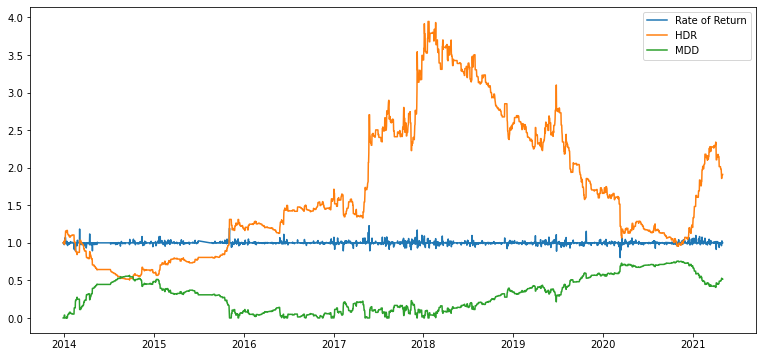

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (13, 6))
ax = plt.axes()
plt.plot(df['ror'], label = 'Rate of Return')
plt.plot(df['hpr'], label = 'HDR')
plt.plot(df['dd'], label = 'MDD')
plt.legend()

In [55]:
stock['close'] = df['close']

In [56]:
stock['max'] = stock['close'].cummax() 

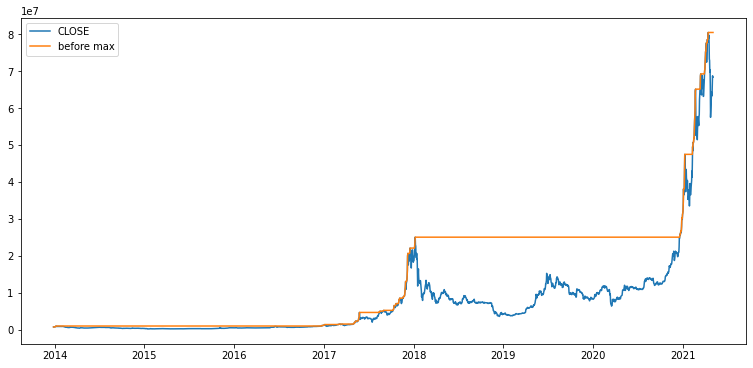

In [58]:
fig = plt.figure(figsize =(13,6))
ax1 = plt.axes()
ax1.plot(stock['close'], label = 'CLOSE')
ax1.plot(stock['max'], label = 'before max')
ax1.legend()

## 7.3 변동성 돌파 + 상승장 전략 백테스팅

### 7.3.1 변동성 돌파 + 상승장 전략 백테스팅

In [59]:
import pybithumb
import numpy as np
import pandas as pd

# 접속
df = pybithumb.get_ohlcv('BTC')

# 5일 이평선, range, target, bull market 여부
df['ma5'] = df['close'].rolling(window =5).mean().shift(1)
df['range'] = (df['high']-df['low'])*0.5
df['target'] = df['open']+df['range'].shift(1)
df['bull'] = df['open']>df['ma5']

# ror, hpr, dd
fee = 0.0032
df['ror'] = np.where(df['high']>df['target'], df['close']/df['target']-fee, 1)
df['hpr'] = df['ror'].cumprod()
df['dd'] = (df['hpr'].cummax() - df['hpr'])/df['hpr'].cummax()

# MDD, HPR 결과 출력
print('MDD :', df['dd'].max())
print('HPR :', df['hpr'][-2])

df.to_excel('larry_ma.xlsx')

MDD : 0.7582388467728851
HPR : 1.910380196725035


### 7.3.2 2021년도 기간수익률이 높은 코인 찾기
* '변동성 돌파 + 상승장 전략'의 기간 수익률이 높은 코인 5개 찾기

In [78]:
import pybithumb
import numpy as np
import pandas as pd

def get_hpr(ticker):
    try :
        df = pybithumb.get_ohlcv(ticker)
        df = df['2021']

        df['ma5'] = df['close'].rolling(window=5).mean().shift(1)
        df['range'] = (df['high']-df['low'])*0.5
        df['target'] = df['open']+df['range'].shift(1)
        df['bull'] = df['open'] > df['ma5']

        # 목표가 이상 & 상승장 일때만 매수
        fee = 0.0032
        df['ror'] = np.where((df['high']>df['target'])&df['bull'], df['close']/df['target']-fee, 1)
        df['hpr'] = df['ror'].cumprod()
        df['dd'] = (df['hpr'].cummax() - df['hpr'])/df['hpr'].cummax()

        return df['hpr'][-2]
    
    except Exception as e:
        print('error :',e)
        return 1

tickers = pybithumb.get_tickers()
hprs = []
for ticker in tickers:
    hpr = get_hpr(ticker)
    hprs.append((ticker, hpr))
    
sorted_hprs = sorted(hprs, key=lambda x:x[1], reverse=True)
print(sorted_hprs[:5])

<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a fut

<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a fut

<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a fut

<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a fut

<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a fut

[('BTT', 4.696146899664577), ('LUNA', 4.335535835921854), ('SAND', 4.17788554637119), ('EL', 3.757162698716363), ('MTL', 3.34832945666202)]


<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']
<ipython-input-78-0acb9300a6d8>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2021']


# 9 웹소켓을 이용한 실시간 시세 처리

+ 이전 : REST API의 요청(request)-응답(reply) 방식
    - 실시간 데이터를 효과적으로 처리하는데 부족하다.
    <br><br>
+ ***웹소켓(websocket)을 이용한 구독(subscribe) 방식***으로 가상화폐 거래소의 실시간 데이터를 처리.

## 9.1 웹소켓 소개

![이미지](./picture/websocet.PNG)

+ ***REST API***의 ***request-reply*** 방식은 체결 시점의 데이터를 지연 없이 얻기 힘들다.
+ 최선의 방법은 0.1초와 같이 정해진 시간마다 주기적으로 시세를 요청해서 가장 최근의 체결가를 얻는 것이다.
    - 이 경우에도 최대 0.1초의 지연이 발생
 <br><br>

+ ***재정거래(arbitriage)***같이 되도록 지연없이 가격을 받아야 할 때는 ***web socket***을 이용하는게 좋다.

+ 웹소켓(wbsocket)구독을 신청해 놓으면, 가상화폐의 가격이 변동될 때마다 알려준다.
<br><br>
+ 웹소켓은 컴퓨터 세상의 규약(프로토콜)으로 클라이언트(내 PC)와 서버(거래소 PC) 사이에서 실시간 양방향 통신을 위한 기술이다.
+ 가상화폐 거래소에서는 실시간 데이터를 전송하는데 웹소켓을 사용하고 있다.

## 9.2 asyncio 기초

### 9.2.1 동기 호출과 비동기 호출 방식

+ `websockets` 모듈을 사용해서 웹소켓을 사용한다.
    - 위 모듈은 파이썬의 비동기(asynchronous) 처리를 위한 asyncio라는 표준 모듈을 기반으로 만들어졌다.
<br><br>

***동기 함수 호출***

   - sync_func1과 sync_func2를 순차적으로 호출하면, ***sync_func1의 호출이 끝난 후, sync_func2가 호출된다.***
   - 이러한 전통적인 함수 호출 방식을 ***동기(synchronous) 호출 방식***이라고 한다.
![이미지](.\\sync.PNG)

In [ ]:
def sync_func1():
    print('Hello')

def sync_func2():
    print('Bye')

sync_func1()
sync_func2()

***비동기 호출 방식***

- 어떤 함수를 처리하는 중에 서버에 접속하는 등의 대기시간이 존재한다면, 그 대기시간 동안 적당한 방식(스케줄링)을 사용해서 다른 함수를 처리.

![이미지](./picture/syn.PNG)

* ***비동기 모델***
   - 수행할 작업이 단순 연산 중심이 아니라, 중간마다 쉴 수 있는 형태의 작업이어야 동기 모델에 비해 좋다.
   - 데이터 등을 ***인터넷에 다운로드 받고 이를 처리하는 함수들***은 먼저 데이터를 다운 받는데 시간이 소요되기 때문에 ***비동기 처리 방식 선호***.
   - 비동기 모델을 잘 처리 하기 위해선 ***스케줄러가 필요하다***

-------------------------------------------------------------------------
***여기부터는 Pycharm 에서 실행***
### 9.2.2. 코루틴(coroutine)

* async 키워드가 있는 함수를 코루틴(coroutine)이라고 한다.
* 함수들 비동기 방식으로 처리 하려면
    - 함수 정의 : ***`async def func_name():`***
    - 코루틴 실행 : ***`asyncio.run(func_name()):`***`


In [ ]:
import asyncio

async def async_func1():
    print('Hello')

asyncio.run(async_func1())

* ***이벤트 루프*** : 코루틴을 잘 처리하기 위해서는 ***스케줄러***가 필요한데 이를 ***이벤트 루프***라고 부름
<br><br>
* `asyncio.run()` 으로 코루틴을 처리하는 것 대신
    * 직접 이벤트 루프 얻고 ***`asyncio.get_event_loop()`***
    * 이벤트 루프를 통해 코루틴을 처리하고 ***`run_until_complete()`***
    * 이벤트 루프를 닫는다 ***`loop.close()`***

In [ ]:
import asyncio

async def async_func1():
    print('Hello')

loop = asyncio.get_event_loop()      # 직접 이벤트 루프 얻고
loop.run_until_complete(async_func1()) # 이벤트 루프를 통해 코루틴 처리하고
loop.close()                         # 루프를 닫는다.

* 아메리카노 코루틴, 커피 라테 코루틴 실행해보자.
* 동시 처리 되는지 살펴보기

* ***`await asyncio.sleep(3)`*** : 코루틴 함수 3초 기다리기
* ***`await asyncio.gather(coro1, coro2)`*** : 두 개의 코루틴 동시 실행
    * ***`await`*** : 코루틴(main) 내의 코루틴(coro1, coro2)을 실행할 때 붙여준다. 
    * ***`asyncio.gather()`*** : 두개 이상의 코루틴을 동시 실행할 때 묶어준다.

* ***`asyncio.run(main())`*** : 이벤트 루프 생성하여 main 코루틴을 처리하고 이벤트 루프를 닫는다.

In [ ]:
import asyncio

async def make_americano():
    print('Americano Start')
    await asyncio.sleep(3)
    print('Americano End')

async def make_latte():
    print('Latte Start')
    await asyncio.sleep(3)
    print('Latte End')

async def main():
    coro1 = make_americano()
    coro2 = make_latte()
    await asyncio.gather(
        coro1,
        coro2
    )

print('Main Start')
asyncio.run(main())
print('Main End')

In [ ]:
import asyncio

async def make_americano():
    print('Americano Start')
    await asyncio.sleep(3)
    print('Americano End')
    return 'Americano'

async def make_latte():
    print('Latte Start')
    await asyncio.sleep(3)
    print('Latte End')
    return 'Latte'

async def main():
    coro1 = make_americano()
    coro2 = make_latte()
    result = await asyncio.gather(
        coro1,
        coro2
    )                 # asyncio.gather 함수가 return 값을 binding 한다.
    print(result)
print('Main Start')
asyncio.run(main())
print('Main End')

## 9.3 프로세스와 스레드 기초

+ 웹소켓을 사용하여 실시간으로 데이터를 받고, 이를 동시에 처리하려면 프로세스와 스레드에 대해서 알아야 한다. 

### 9.3.1 프로세스와 스레드

+ 프로그램은 메모리에 로드된 다음 운영체제(window)에 의해 실행된다.
    - 이때 이 ***실행중인 프로그램을 프로세스(process)*** 라고 부른다.
<br><br>

***스레드***

![이미지](./picture/thread.PNG)

+ ***스레드*** : 프로세스의 실행단위
  + ***단일 스레드*** : 프로세스 당 한개의 스레드로 구성
  + ***다중 스레드*** : 프로세스 당 두개 이상의 스레드로 구성
  <br><br>
  + 프로세스 간엔 독립적, 자원을 공유하려면 통신을 이용해야한다.
  + 프로세스 내의 스레드는 프로세스의 자원을 공유한다.
  


### 9.3.2 스레드 스케줄링

* 하나의 CPU로 여러 프로그램을 동시에 실행할 수 있는 이유
   - 스케줄링 : 여러 프로그램을 짧은 시간 마다 실행 시킴으로서, 동시에 실행되는 것처럼 진행.
   - 스레드 : 스케중링의 기본 단위

### 9.3.3 multiprocessing 모듈

+ 메인 프로세스 : 파이썬 코드 실행 -> 인터프리터가 코드 해석 -> 실행
<br><br>
+ ***`multiprocessing`*** 모듈의 ***`current_process`*** 함수를 호출하면 현재 실행되는 프로세스에 대한 정보를 담고 있는 객체를 얻을 수 있다.
+ 해당 객체의 ***name***과 ***pid*** 속성에 접근하면 ***프로세스의 이름***과 ***PID(process ID)***를 얻을 수 있다.
    - PID : 운영체제가 각 프로세스에 부여한 고유 번호
        + 프로세스의 우선 순위를 조정하거나 종료할 수 있다.

In [ ]:
import multiprocessing as mp

if __name__ == "__main__":
    proc = mp.current_process()
    print(proc.name)        # 프로세스 이름 : MainProcess
    print(proc.pid)         # PID : 12872

* **프로세스 스포닝(spawning)*** 
    - 부모 프로세스(parent process)가 운영체제에 요청해 ***자식 프로세스(child process)를 새로 만들 수 있다***.
    - `multiprocessing` 모듈을 활용해서 할 수 있다.
    <br><br>
    - 부모가 할일이 너무 많으면 일정 부분을 자식에게 위임할 수 있다.
        + ***`전역 인터프리터 록 문제`*** 때문에 스레드를 사용하는 것 보다 성능이 좋다.
<br><br>

***방법***

* Process(name = 자식 프로세스, target = 위임할 일(함수)) 클래스의 인스턴스 생성.
* 인스턴스.start() 메소드 호출
<br><br>

***아래는 `MainProcess`라는 이름의 부모 프로세스가 `SubProcess`라는 이름의 자식 프로세스를 스포닝한다.***

***Process 클래스의 객체를 생성한 후 start 메소드를 호출하는 순간 그림과 같이 자식 프로세스가 스포닝 되고 target으로 지정된 함수를 처리한다.***
![이미지](./spawn.PNG)

In [5]:
import multiprocessing as mp
import time

def worker():
    proc = mp.current_process()
    print(proc.name)
    print(proc.pid)
    time.sleep(5)
    print('SubProcess End')

if __name__ == "__main__":
    # main process
    proc = mp.current_process()
    print(proc.name)
    print(proc.pid)

    #process spawning
    p = mp.Process(name = 'SubProcess', target= worker)
    p.start()
    time.sleep(3)
    print('MainProcess End')

MainProcess
14784
MainProcess End


## 9.4 빗썸 파이썬 웹소켓

### 9.4.1 websockets 모듈 설치

* `pip install websockets`

### 9.4.2 웹소켓 클라이언트

* 웹소켓 기반으로 서버와 클라이언트 프로그램 개발 가능
* 아래는, 각 거래소의 웹소켓 서버로부터 실시간 데이터를 전송받는 클라이언트 파트 를 만들어보자
* 빗썸 거래소의 웹소켓 서버에 접근 후 메시지를 받아와 출력하자.

In [ ]:
import websockets
import asyncio

async def bithumb_ws_client():                           # 비동기 함수 앞에는 async 를 써준다.
    uri = 'wss://pubwss.bithumb.com/pub/ws'

    async with websockets.connect(uri) as websocket :   # 빗썸 웹소켓 서버에 연결, with 사용해서 자동으로 닫아주기
        greeting = await websocket.recv()               # 서버로부터 데이터를 받는다.
        print(greeting)                                  # 서버로부터 받은 데이터 출력

async def main():                                       # 비동기 함수 앞에는 async 를 써준다.
    await bithumb_ws_client()                           # 코루틴 안에서 코루틴 실행시 await 사용

asyncio.run(main())

### 9.4.3 빗썸 거래소 웹소켓 구독하기

+ 빗썸 거래소의 웹소켓은 한번 구독 요청을 하면 계속해서 실시간 데이터를 전달해준다.
+ 빗썸 거래소의 비트코인의 현재가 구독 및 서버 전달, 출력 프로그램
+ `import json`
   - `json.dumps(Dict)` : Python dict 형식을 json 형식으로
   - `json.loads(json)` : json 형식을 dict 형식으로

In [ ]:
import websockets
import asyncio
import json

async def bithumb_ws_client():
    uri = 'wss://pubwss.bithumb.com/pub/ws'

    async with websockets.connect(uri, ping_interval=None) as websocket:  # ping frame을 보내지 않는다.
        greeting = await websocket.recv()
        print(greeting)

        # type에는 현재가(ticker), 체결내역(transaction), 호가(orderdepth) 중 하나를 입력
        subscribe_fmt = {
            "type" : "ticker",
            "symbols" : ["BTC_KRW"],
            "tickTypes" : ['30M']
        }
        # subscribe_data : 내가 구독할 데이터들!! 
        subscribe_data = json.dumps(subscribe_fmt)  # json 모듈을 사용해서 파이썬 dict를 JSON 타입으로 변환

        await websocket.send(subscribe_data) # 구독 요청을 서버에 전송
        while True: # 반복적으로 데이터를 얻기 위해 while로 무한 루프
            data = await websocket.recv() # 빗썸 서버로 부터 데이터를 받는다.
            data = json.loads(data)       # JSON ->dict 형태로 변환
            print(data)

async def main():
    await bithumb_ws_client()

asyncio.run(main())

### 9.4.4 실시간 데이터 출력

+ 웹소켓을 사용하면 서버로부터 실시간 데이터를 전달 받을 수 있다.
+ 실시간 데이터를 GUI에 출력.
+ GUI 프로그램, 코루틴은 각각 자신의 이벤트 루프를 갖는다.
   - ***따라서 각각을 서로 다른 프로세스로 생성해줘야 한다.***
<br><br>

* ***multiprocessing 모듈 : 여러개의 프로세스 생성***
    * 서로 다른 프로세스 간의 데이터 전송을 위해 ***queue를 사용***.
    * GUI 프로그램(프로세스)
        - ***큐(Queue)***로부터 데이터를 가져오는 역할을 하는 'Dummy-1' 스레드와
        - 가져온 데이터를 GUI 화면에 출력하는 'Main Thread'로 구성
![이미지](.\\multi.PNG)

In [ ]:
import multiprocessing as mp
import websockets
import asyncio
import json
import sys
import datetime
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *

## 11 ~ 26  웹소켓으로 데이터를 받기 위한 코루틴입니다. 데이터를 받으면 이를 큐에 저장합니다.
async def bithumb_ws_client(q):
    uri = 'wss://pubwss.bithumb.com/pub/ws'

    async with websockets.connect(uri, ping_interval=None) as websocket:
        subscribe_fmt = {
            "type": "ticker",
            "symbols": ["BTC_KRW"],
            "tickTypes": ['30M']
        }

        subscribe_data = json.dumps(subscribe_fmt)
        await websocket.send(subscribe_data)

        while True:
            data = await websocket.recv()
            data = json.loads(data)
            q.put(data)

async def main(q):
    await bithumb_ws_client(q)

def producer(q):
    asyncio.run(main(q))

# PyQt의 QThread 클래스를 사용해서 생성되는 스레드, 이 스레드는 시작되면
# 큐에 데이터 있으면 이를 뺀 후 시그널을 통해 UI를 담당하는 스레드에 알려줍니다.
class Consumer(QThread):
    poped = pyqtSignal(dict)   # poped 라는 사용자 정의 시그널.

    def __init__(self, q):
        super().__init__()
        self.q = q

    def run(self):
        while True:
            if not self.q.empty():     # q가 빈 값이 아니라면
                data = q.get() 
                self.poped.emit(data)  # poped 라는 사용자 정의 시그널을 보낸다.

# UI를 구성하는 클래스입니다.
class MyWindow(QMainWindow):
    def __init__(self, q):
        super().__init__()
        self.setGeometry(200, 200, 400, 200)
        self.setWindowTitle('Bithumb Websocket with PyQt')

        # thread for data consumer
        self.consumer = Consumer(q)
        self.consumer.poped.connect(self.print_data)      # signal을 받으면, self.print_data 함수와 consumer를 바인딩한다. 
        self.consumer.start()

        #widget

        self.label = QLabel("Bitcoin: ", self)
        self.label.move(10, 10)

        # QLineEdit
        self.line_edit = QLineEdit(" ", self)
        self.line_edit.resize(150, 30)
        self.line_edit.move(100, 10)


    @pyqtSlot(dict)
    def print_data(self, data):
        content = data.get('content')
        if content is not None:
            current_price = int(content.get('closePrice'))
            self.line_edit.setText(format(current_price, ",d"))

        now = datetime.datetime.now()
        self.statusBar().showMessage(str(now))

# 큐를 생성합니다.
if __name__ == "__main__":
    q = mp.Queue()
    # 프로세스 스포닝을 통해서 서브 프로세스를 생성합니다.
    # 서브 프로세스는 producer라는 함수의 실행하는데 이때 생성된 큐를 함수 인자로 전달합니다.
    p = mp.Process(name="Producer", target=producer, args=(q,), daemon=True)
    p.start()

    # Main process : GUI 프로세스를 실행합니다.
    app = QApplication(sys.argv)
    mywindow = MyWindow(q)
    mywindow.show()
    app.exec_()


### 9.4.5 pybithumb 모듈을 이용한 실시간 데이터 출력

+ pybithumb 모듈을 이용하면 웹소켓을 보다 쉽게 이용할 수 있다.
+ pybithumb 모듈이 서버로부터 데이터를 받은 후 내부에서 생성한 큐에 데이터를 저장해준다.
+ pybithumb 모듈을 사용하면 asyncio를 통해 데이터를 받아오는 부분을 직접 코딩할 필요가 없어서 편하게 사용 가능하다.

In [ ]:
from pybithumb import WebSocketManager
import sys
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import QIcon
import time


class Worker(QThread):
    recv = pyqtSignal(str)

    def run(self):
        # Bithumb의 웹소켓을 만드는 부분
        wm = WebSocketManager('ticker', ['BTC_KRW'])
        while True:
            data = wm.get()
            self.recv.emit(data['content']['closePrice'])


class MyWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        label = QLabel('BTC', self)
        label.move(20, 20)

        self.price = QLabel('-', self)
        self.price.move(80, 20)
        self.price.resize(100, 20)

        button = QPushButton('Start', self)
        button.move(20, 50)
        button.clicked.connect(self.click_btn)

        self.th = Worker()
        self.th.recv.connect(self.receive_msg)

    @pyqtSlot(str)
    def receive_msg(self, msg):
        print(msg)
        self.price.setText(msg)

    def click_btn(self):
        self.th.start()

if __name__ == '__main__':
    app = QApplication(sys.argv)
    mywindow = MyWindow()
    mywindow.show()
    app.exec_()

# 10 나만의 HTS 만들기

![이미지](./picture/GUI.PNG)

* 빗썸 API : 초당 135회 호출 가능
* 업비트 초당 8회, 분당 200회/ 주문 외 조회 초당 30회, 분당 900회.
* Qt 디자이너 사용, 버튼 클릭 후 새로운 창 형성, 창이 움직임 이런거는 코드로 직접 작성

`pip install PyQtChart`

## 10.1 실시간 현재가 차트

![이미지](./picture/form1.PNG)

In [ ]:
import sys
from PyQt5 import uic
from PyQt5.QtWidgets import QWidget

# 추후 메인 GUI에 추가할 목적이므로 QWidget 클래스를 상속하는 ChartWidget클래스를 정의 합니다.
class ChartWidget(QWidget):
    # parent = None : 새로운 창에 그려라!, ticker는 BTC 정보
    def __init__(self, parent=None, ticker='BTC'):
        super().__init__(parent)
        uic.loadUi('resource/chart.ui', self)
        self.ticker = ticker
    

if __name__ == '__main__':
    from PyQt5.QtWidgets import QApplication
    app = QApplication(sys.argv)
    cw = ChartWidget()        # 이벤트 루프 사이에서 위젯 생성
    cw.show()
    exit(app.exec_())

![이미지](./picture/form.PNG)

In [ ]:
import sys
from PyQt5 import uic
from PyQt5.QtWidgets import QWidget
from PyQt5.QtChart import QLineSeries, QChart
# QLineSeries : 차트에 표현될 데이터를 관리한다(도화지에 그려진 선)
# QChart : 데이터가 그려질 공간(도화지)

class ChartWidget(QWidget):
    def __init__(self, parent=None, ticker='BTC'):
        super().__init__(parent)
        uic.loadUi('resource/chart.ui', self)
        self.ticker = ticker
        self.viewLimit = 128 # 라인 차트로 그릴 데이터의 수를 미리 정의

        # QLineSeries 객체의 append메서드로 출력할 데이터의 좌표를 x, y 순서대로 입력한다.
        #(0, 10), (1, 20), (2, 10) 세개의 포인트를 추가
        self.priceData = QLineSeries()
        self.priceData.append(0, 10)
        self.priceData.append(1, 20)
        self.priceData.append(9, 20)
        self.priceData.append(10, 10)

        # 데이터를 차트 객체로 전달해서 시각화 한다./ QChart를 사용해 차트의 타이틀을 입력하거나 범례를 추가하는 등의 일을 할 수 잇따.
        self.priceChart = QChart()
        self.priceChart.addSeries(self.priceData)

        # 차트를 ui에서 그려놨던 priceView로 출력한다.
        self.priceView.setChart(self.priceChart)

if __name__ == '__main__':
    from PyQt5.QtWidgets import QApplication
    app = QApplication(sys.argv)
    cw = ChartWidget()
    cw.show()
    exit(app.exec_())



* 범례를 제거하고 아티팩트를 제거하기 위한 anti-aliasing을 차트에 적용한다.
![form2.PNG](./picture/form2.PNG)

In [ ]:
import sys
from PyQt5 import uic
from PyQt5.QtWidgets import QWidget
from PyQt5.QtChart import QLineSeries, QChart
# QLineSeries : 차트에 표현될 데이터를 관리한다(도화지에 그려진 선)
# QChart : 데이터가 그려질 공간(도화지)

from PyQt5.QtGui import QPainter
# Antialiasing을 제거하는데 사용되는 모듈을 import 한다.


class ChartWidget(QWidget):
    def __init__(self, parent=None, ticker='BTC'):
        super().__init__(parent)
        uic.loadUi('resource/chart.ui', self)
        self.ticker = ticker
        self.viewLimit = 128 # 라인 차트로 그릴 데이터의 수를 미리 정의

        # QLineSeries 객체의 append메서드로 출력할 데이터의 좌표를 x, y 순서대로 입력한다.
        #(0, 10), (1, 20), (2, 10) 세개의 포인트를 추가
        self.priceData = QLineSeries()
        self.priceData.append(0, 10)
        self.priceData.append(1, 20)
        self.priceData.append(9, 20)
        self.priceData.append(10, 10)

        # 데이터를 차트 객체로 전달해서 시각화 한다./ QChart를 사용해 차트의 타이틀을 입력하거나 범례를 추가하는 등의 일을 할 수 잇따.
        self.priceChart = QChart()
        self.priceChart.addSeries(self.priceData)

        # 차트를 ui에서 그려놨던 priceView로 출력한다.
        self.priceView.setChart(self.priceChart)

        self.priceChart.legend().hide() # 차트의 범례를 숨긴다.
        self.priceView.setRenderHints(QPainter.Antialiasing) # 차트에 anti-aliasing을 적용

if __name__ == '__main__':
    from PyQt5.QtWidgets import QApplication
    app = QApplication(sys.argv)
    cw = ChartWidget()
    cw.show()
    exit(app.exec_())


* 차트의 X축과 Y축을 명확히 기술해준다.
* 데이터를 append하는 코드를 제거하고 X축의 단위를 시간으로 변경한다.
![form3.PNG](./picture/form3.PNG)

In [ ]:
import sys
from PyQt5 import uic
from PyQt5.QtWidgets import QWidget
from PyQt5.QtChart import QLineSeries, QChart
# QLineSeries : 차트에 표현될 데이터를 관리한다(도화지에 그려진 선)
# QChart : 데이터가 그려질 공간(도화지)

from PyQt5.QtGui import QPainter
# Antialiasing을 제거하는데 사용되는 모듈을 import 한다.

from PyQt5.QtChart import QLineSeries, QChart, QValueAxis, QDateTimeAxis
from PyQt5.QtCore import Qt, QDateTime

class ChartWidget(QWidget):
    def __init__(self, parent=None, ticker='BTC'):
        super().__init__(parent)
        uic.loadUi('resource/chart.ui', self)
        self.ticker = ticker
        self.viewLimit = 128 # 라인 차트로 그릴 데이터의 수를 미리 정의

        # QLineSeries 객체의 append메서드로 출력할 데이터의 좌표를 x, y 순서대로 입력한다.
        #(0, 10), (1, 20), (2, 10) 세개의 포인트를 추가
        self.priceData = QLineSeries()
        # 데이터를 차트 객체로 전달해서 시각화 한다./ QChart를 사용해 차트의 타이틀을 입력하거나 범례를 추가하는 등의 일을 할 수 잇따.
        self.priceChart = QChart()
        self.priceChart.addSeries(self.priceData)
        self.priceChart.legend().hide()  # 차트의 범례를 숨긴다.

        # 차트 축 설정하는 부분
        axisX = QDateTimeAxis()      # PyChart에서 날짜 축을 관리하는 QDateTimeAxis 객체를 생성합니다.
        axisX.setFormat('hh:mm:ss')  # 날짜는 시:분:초 형태로 차트에 표시합니다.
        axisX.setTickCount(4)        # 차트에 표시할 날짜의 개수를 4로 지정합니다.
        dt = QDateTime.currentDateTime()  # 현재 시간 정보를 QDataTime 객체로 언어온다.
        axisX.setRange(dt, dt.addSecs(self.viewLimit)) # X축에 출력될 값의 범위를 현재 시간부터 viewLimit(120)초 이후까지 설정합니다.
                                                        # addSecs 메서드는 지정된 초 이후의 시간을 QDateTime으로 반환합니다.

        # 정수를 저장하는 축을 생성하고 축의 레이블을 차트에 표시하지 않습니다.
        axisY = QValueAxis()
        axisY.setVisible(False)

        # 생성한 X, Y축을 차트와 데이터에 연결합니다.
        self.priceChart.addAxis(axisX, Qt.AlignBottom)
        self.priceChart.addAxis(axisX, Qt.AlignRight)
        self.priceData.attachAxis(axisX)
        self.priceData.attachAxis(axisY)

        # 차트 객체 안에 여백을 최소화해서 차트를 크게 그립니다. 왼쪽/위쪽/오른쪽/아래쪽 여백을 0으로 설정하라는 의미.
        self.priceChart.layout().setContentsMargins(0, 0, 0, 0)


        # 차트를 ui에서 그려놨던 priceView로 출력한다.
        self.priceView.setChart(self.priceChart)
        self.priceView.setRenderHints(QPainter.Antialiasing) # 차트에 anti-aliasing을 적용

if __name__ == '__main__':
    from PyQt5.QtWidgets import QApplication
    app = QApplication(sys.argv)
    cw = ChartWidget()
    cw.show()
    exit(app.exec_())

* 데이터를 append하는 코드를 제거하고 X축의 단위를 시간으로 변경한다.
![form4.PNG](./picture/form4.PNG)

In [5]:
import sys
from PyQt5 import uic
from PyQt5.QtWidgets import QWidget
from PyQt5.QtGui import QPainter    # Antialiasing을 제거하는데 사용되는 모듈을 import 한다.
from PyQt5.QtChart import QLineSeries, QChart, QValueAxis, QDateTimeAxis
        # QLineSeries : 차트에 표현될 데이터를 관리한다(도화지에 그려진 선)
        # QChart : 데이터가 그려질 공간(도화지)
from PyQt5.QtCore import Qt, QDateTime

import time
import pybithumb
from PyQt5.QtCore import QThread, pyqtSignal


class ChartWidget(QWidget):
    def __init__(self, parent=None, ticker='BTC'):
        super().__init__(parent)
        uic.loadUi('resource/chart.ui', self)
        self.ticker = ticker
        self.viewLimit = 120 # 라인 차트로 그릴 데이터의 수를 미리 정의

        # QLineSeries 객체의 append메서드로 출력할 데이터의 좌표를 x, y 순서대로 입력한다.
        #(0, 10), (1, 20), (2, 10) 세개의 포인트를 추가
        self.priceData = QLineSeries()
        # 데이터를 차트 객체로 전달해서 시각화 한다./ QChart를 사용해 차트의 타이틀을 입력하거나 범례를 추가하는 등의 일을 할 수 잇따.
        self.priceChart = QChart()
        self.priceChart.addSeries(self.priceData)
        self.priceView.setChart(self.priceChart)
        self.priceChart.legend().hide()  # 차트의 범례를 숨긴다.


        # 차트 축 설정하는 부분
        axisX = QDateTimeAxis()      # PyChart에서 날짜 축을 관리하는 QDateTimeAxis 객체를 생성합니다.
        axisX.setFormat('hh:mm:ss')  # 날짜는 시:분:초 형태로 차트에 표시합니다.
        axisX.setTickCount(4)        # 차트에 표시할 날짜의 개수를 4로 지정합니다.
        dt = QDateTime.currentDateTime()  # 현재 시간 정보를 QDataTime 객체로 언어온다.
        axisX.setRange(dt, dt.addSecs(self.viewLimit)) # X축에 출력될 값의 범위를 현재 시간부터 viewLimit(120)초 이후까지 설정합니다.
                                                        # addSecs 메서드는 지정된 초 이후의 시간을 QDateTime으로 반환합니다.

        # 정수를 저장하는 축을 생성하고 축의 레이블을 차트에 표시하지 않습니다.
        axisY = QValueAxis()
        axisY.setVisible(False)

        # 생성한 X, Y축을 차트와 데이터에 연결합니다.
        self.priceChart.addAxis(axisX, Qt.AlignBottom)
        self.priceChart.addAxis(axisY, Qt.AlignRight)
        self.priceData.attachAxis(axisX)
        self.priceData.attachAxis(axisY)

        # 차트 객체 안에 여백을 최소화해서 차트를 크게 그립니다. 왼쪽/위쪽/오른쪽/아래쪽 여백을 0으로 설정하라는 의미.
        self.priceChart.layout().setContentsMargins(0, 0, 0, 0)


        # 차트를 ui에서 그려놨던 priceView로 출력한다.
        self.priceView.setChart(self.priceChart)
        self.priceView.setRenderHints(QPainter.Antialiasing) # 차트에 anti-aliasing을 적용

        ## 메인 위젯에서 PriceWorker 객체를 생성하고 dataSent 이벤트를 연결할 슬롯을 지정한다.
        self.pw = PriceWorker(ticker)
        self.pw.dataSent.connect(self.appendData)
        self.pw.start()

    ## PriceWorker 스레드의 올바른 종룔를 위해 closeEvent 메서드를 정의한다.
    ## 부모 QWidget에 정의된 메서드로 UI의 종료 버튼을 누르면 실행.
    ## 자식 클래스에서 closeEvent를 재정의해서 종료되기 전 스레드를 종요한다./ (메서드 오버라이딩)
    def closeEvent(self, event):
        self.pw.close()


    # 차트에 그릴 데이터를 입력받는 appendData 메서드. 데이터는 QLineSeries에 viewLimit(120)개 까지 저장한다.
    # 만약 120개의 데이터가 저장돼 있다면 오래된 데이터 하나 제거하고 새로운 데이터를 추가한다.
    def appendData(self, currPrice):
        if len(self.priceData) == self.viewLimit:    # 정해진 데이터 개수만큼 저장돼 있다면 오래된 0번 인덱스의 데이터를 삭제한다.
            self.priceData.remove(0)   # QLineSeries 객체의 remove 메서드는 인덱스를 입력받아 데이터를 제거한다.

        # 현재 시간 정보를 얻어와서 시간과 현재가(currPrice)를 함께 저장
        dt = QDateTime.currentDateTime()
        self.priceData.append(dt.toMSecsSinceEpoch(), currPrice) # append 메서드는 millisecond(ms)를 입력받으므로,
        self.__updateAxis()                                       #toMSecsSinceEpoch() 메서드로 QDateTime 객체를 millisecond로 변환
        # 차트의 축정보를 업데이트하는 __updateAxis() 메서드를 호출. 실시간으로 추가되는 데이터의 위치를 지정.

    ## __updateAxis 메서드 추가. 데이터가 실시간으로 입력되면 X, Y축 정보를 조절해서 어느 구간을 출력할지 결정
    def __updateAxis(self):
        pvs = self.priceData.pointsVector() # pointsVecotr 메서드를 사용해서 QLineSeries 객체에 저장된 데이터를 리스트로 얻어 온다.
                                            # pvs에 저장된 리스 안에는 QPointF 객체로 위치 정보가 저장돼 있다.
        dtStart = QDateTime.fromMSecsSinceEpoch(int(pvs[0].x())) # 가장 오래된 데이터 [0번 인덱스] 꺼내와서 x 좌표에 저장된 값을 가져온다.
                            # fromMSecsSinceEpoch : MS -> HH:MM:SS 형태로 바꿔준다./ QDateTime 객체로 변환한다.
        if len(self.priceData) == self.viewLimit :
            dtLast = QDateTime.fromMSecsSinceEpoch(int(pvs[-1].x())) # 최근 시간 정보를 가져온다. QDateTime 객체로 반환
        else:
            dtLast = dtStart.addSecs(self.viewLimit)  # 최근 시간 +(addSecs)[self.viewLimit = 120초]를 마지막 시간으로 설정해준다.
            # 데이터 개수가 viewLimit보다 작다면 시작 위치 0번을 기준으로 viewLimit 초 이후까지 출력한다.

        # 앞에서 얻어온 위치 정보를 보여줄 수 있도록 X축의 번위를 설정한다.
        ax = self.priceChart.axisX()
        ax.setRange(dtStart, dtLast)


        # QPontF 객체에서 y 좌표를 가져와서 최솟값, 최댓값으로 Y축에 표시될 범위를 지정합니다.
        ay = self.priceChart.axisY()
        dataY = [v.y() for v in pvs]
        ay.setRange(min(dataY), max(dataY))




## 데이터를 얻어와서 차트와 연결해주는 부분.
class PriceWorker(QThread): # QThread를 상속받은 PriceWorker 클래스를 정의한다.
    dataSent = pyqtSignal(float) # 메인 스레드에 데이터를 전달하기 위한 dataSent 시그널을 정의한다.

    def __init__(self, ticker):
        super().__init__()
        self.ticker = ticker
        self.alive = True    # QThread를 안전하게 종료하기 위해 인스턴스 변수를 사용한다. alive의 초기값을 True입니다.

    # close 함수가 실행되기 전까지 데이터를 받아오고, 시그널을 내보낸다.
    def run(self):
        while self.alive :
            data = pybithumb.get_current_price(self.ticker)
            time.sleep(0.5)
            self.dataSent.emit(data)

    # 메인 스레드에서 close 메서드가 호출되면, PriceWorker 스레드의 종료를 의미한다.
    def close(self):
        self.alive = False





if __name__ == '__main__':
    from PyQt5.QtWidgets import QApplication
    app = QApplication(sys.argv)
    cw = ChartWidget()
    cw.show()
    exit(app.exec_())



## 10.2 실시간 호가창

* 호가창은 정해진 위치에 규칙적으로 출력되는 데이터로, `QTableWidget`을 응요해서 만든다.

In [1]:
import sys
from PyQt5 import uic
from PyQt5.QtWidgets import QWidget

class OrderbookWidget(QWidget):
    def __init__(self, parent=None, ticker = 'BTC'):
        super().__init__(parent)
        uic.loadUi('resource/orderbook.ui', self)
        self.ticker = ticker


if __name__ == '__main__':
    import sys
    from PyQt5.QtWidgets import QApplication
    app = QApplication(sys.argv)
    ow = OrderbookWidget()
    ow.show()
    exit(app.exec_())

In [1]:
import sys
import time
import pybithumb
from PyQt5 import uic
from PyQt5.QtWidgets import QWidget, QTableWidgetItem, QProgressBar
# 테이블에 표현될 데이터를 정의하기 위한 모듈을 import한다.
from PyQt5.QtCore import Qt, QThread, pyqtSignal

from PyQt5.QtWidgets import QApplication

class OrderbookWidget(QWidget):
    def __init__(self, parent=None, ticker = 'BTC'):
        super().__init__(parent)
        uic.loadUi('resource/orderbook.ui', self)
        self.ticker = ticker

        for i in range(self.tableBids.rowCount()):
            # 매도 호가 테이블의 1열에 저장될 문자열 객체를 생성하고 오른쪽 정렬한다.
            item_0 = QTableWidgetItem(str(""))
            item_0.setTextAlignment(Qt.AlignRight | Qt.AlignVCenter)
            self.tableAsks.setItem(i, 0, item_0)

            # 메도 호가 테이블의 2열에 저장될 문자열 객체를 생성하고 오른쪽 정렬한다.
            item_1 = QTableWidgetItem(str(""))
            item_1.setTextAlignment(Qt.AlignRight | Qt.AlignVCenter)
            self.tableAsks.setItem(i, 1, item_1)

            # 3열에 저장될 호가 잔량을 시각화 하기 위한 QProgressBar 객체를 생성한다.
            item_2 = QProgressBar(self.tableAsks)
            # QProgressBar에 출력될 텍스트는 가운데 정렬한다.
            item_2.setAlignment(Qt.AlignRight | Qt.AlignVCenter)
            ## CSS로 셀의 배경 색상을 흰색, ProgressBar의 게이지를 투명도가 부여된 빨강으로 지정.
            item_2.setStyleSheet('''
            QProgressBar {background-color : rgba(0, 0, 0, 0%); border : 1}
            QProgressBar :: Chunk {background-color : rgba(255, 0, 0, 50%); border : 1}
            ''')
            # 객체를 테이블의 3열에 저장한다.
            self.tableAsks.setCellWidget(i, 2, item_2)

            # 매수 호가
            item_0 = QTableWidgetItem(str(""))
            item_0.setTextAlignment(Qt.AlignRight | Qt.AlignVCenter)
            self.tableBids.setItem(i, 0, item_0)

            item_1 = QTableWidgetItem(str(""))
            item_1.setTextAlignment(Qt.AlignRight | Qt.AlignVCenter)
            self.tableBids.setItem(i, 1, item_1)

            item_2 = QProgressBar(self.tableBids)
            item_2.setAlignment(Qt.AlignRight | Qt.AlignVCenter)
            item_2.setStyleSheet('''
            QProgressBar {background-color : rgba(0, 0, 0, 0%); border : 1}
            QProgressBar :: Chunk {background-color : rgba(255, 0, 0, 50%); border : 1}
            ''')
            self.tableBids.setCellWidget(i, 2, item_2)

        # OrderbookWidget의 생성자에서 OrderbookWorker를 생성하고 dataSent 시그널을 연결할 슬롯을 정의한다.
        # 데이터를 얻어오는 QThread를 실행한다.
        self.ow = OrderbookWorker(self.ticker)
        self.ow.dataSent.connect(self.updateData)
        self.ow.start()


    # QThread에서 시그널이 전송되면 updateData가 실행된다.
    def updateData(self, data):
        print(data)

    # Qhtread의 종룔를 처리하기 위해 QWidget의 메서드를 오버라이딩합니다.
    # 메인 위젯이 종료될 때 closeEvent 메서드가 실행됩니다.
    def closeEvent(self, data):
        self.ow.close()



# 데이터를 얻어오는 OrderbookWorker 스레드를 정의
class OrderbookWorker(QThread):
    dataSent = pyqtSignal(dict)     # dict를 반환하는 dataSent 시그널을 정의한다.

    def __init__(self, ticker):
        super().__init__()
        self.ticker = ticker
        self.alive = True

    def run(self):
        while self.alive:
            data = pybithumb.get_orderbook(self.ticker, limit=10)  # 공개 API를 사용해서 orderbook을 매수/매도 각각 10개씩 얻어온다.
            time.sleep(0.05)  # 초당 20번의 요청을 수행.
            self.dataSent.emit(data)

    def close(self):
        self.alive = False





if __name__ == '__main__':
    app = QApplication(sys.argv)
    ow = OrderbookWidget(ticker='BTC')
    ow.show()
    exit(app.exec_())

{'timestamp': '1620477009934', 'payment_currency': 'KRW', 'order_currency': 'BTC', 'bids': [{'price': 69952000.0, 'quantity': 0.1935}, {'price': 69943000.0, 'quantity': 0.0653}, {'price': 69942000.0, 'quantity': 1.2}, {'price': 69931000.0, 'quantity': 0.3}, {'price': 69930000.0, 'quantity': 0.2105}, {'price': 69927000.0, 'quantity': 1.3888}, {'price': 69906000.0, 'quantity': 0.0046}, {'price': 69891000.0, 'quantity': 0.0022}, {'price': 69889000.0, 'quantity': 0.0083}, {'price': 69886000.0, 'quantity': 0.015}], 'asks': [{'price': 69992000.0, 'quantity': 0.04751048}, {'price': 69998000.0, 'quantity': 0.3186}, {'price': 69999000.0, 'quantity': 0.0011}, {'price': 70000000.0, 'quantity': 3.71027293}, {'price': 70002000.0, 'quantity': 0.4184}, {'price': 70003000.0, 'quantity': 0.015}, {'price': 70008000.0, 'quantity': 0.0896}, {'price': 70009000.0, 'quantity': 0.0025}, {'price': 70010000.0, 'quantity': 0.0005}, {'price': 70019000.0, 'quantity': 0.0347}]}
{'timestamp': '1620477009934', 'payme

{'timestamp': '1620477009934', 'payment_currency': 'KRW', 'order_currency': 'BTC', 'bids': [{'price': 69952000.0, 'quantity': 0.1935}, {'price': 69943000.0, 'quantity': 0.0653}, {'price': 69942000.0, 'quantity': 1.2}, {'price': 69931000.0, 'quantity': 0.3}, {'price': 69930000.0, 'quantity': 0.2105}, {'price': 69927000.0, 'quantity': 1.3888}, {'price': 69906000.0, 'quantity': 0.0046}, {'price': 69891000.0, 'quantity': 0.0022}, {'price': 69889000.0, 'quantity': 0.0083}, {'price': 69886000.0, 'quantity': 0.015}], 'asks': [{'price': 69992000.0, 'quantity': 0.04751048}, {'price': 69998000.0, 'quantity': 0.3186}, {'price': 69999000.0, 'quantity': 0.0011}, {'price': 70000000.0, 'quantity': 3.71027293}, {'price': 70002000.0, 'quantity': 0.4184}, {'price': 70003000.0, 'quantity': 0.015}, {'price': 70008000.0, 'quantity': 0.0896}, {'price': 70009000.0, 'quantity': 0.0025}, {'price': 70010000.0, 'quantity': 0.0005}, {'price': 70019000.0, 'quantity': 0.0347}]}
{'timestamp': '1620477009934', 'payme

{'timestamp': '1620477011969', 'payment_currency': 'KRW', 'order_currency': 'BTC', 'bids': [{'price': 69952000.0, 'quantity': 0.1723}, {'price': 69931000.0, 'quantity': 0.3}, {'price': 69927000.0, 'quantity': 1.3888}, {'price': 69906000.0, 'quantity': 0.0046}, {'price': 69901000.0, 'quantity': 0.015}, {'price': 69891000.0, 'quantity': 0.0022}, {'price': 69889000.0, 'quantity': 0.0083}, {'price': 69886000.0, 'quantity': 0.015}, {'price': 69877000.0, 'quantity': 0.0005}, {'price': 69867000.0, 'quantity': 0.015}], 'asks': [{'price': 69989000.0, 'quantity': 1.2}, {'price': 69992000.0, 'quantity': 0.04751048}, {'price': 69998000.0, 'quantity': 0.3186}, {'price': 69999000.0, 'quantity': 0.0011}, {'price': 70000000.0, 'quantity': 3.71027293}, {'price': 70002000.0, 'quantity': 0.4184}, {'price': 70003000.0, 'quantity': 0.015}, {'price': 70008000.0, 'quantity': 0.0896}, {'price': 70009000.0, 'quantity': 0.0025}, {'price': 70010000.0, 'quantity': 0.0264}]}
{'timestamp': '1620477011969', 'payment